In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Modelos scikit-learn

```
#-------------------------------------------------------------------------------
# Implementação do Modelo logístico
#-------------------------------------------------------------------------------
```
## `from sklearn.linear_model import LogisticRegression`
```
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TenYearCHD'])
y = df.TenYearCHD

X_train, X_test, y_train, y_test = \
train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

```
## `clf = LogisticRegression(max_iter=10000)`
```
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( f'{clf.score(X_test,y_test):.2f}' )
```

```
#-------------------------------------------------------------------------------
# Implementação do Modelo Knn
#-------------------------------------------------------------------------------
```
## `from sklearn.neighbors import KNeighborsClassifier`
```
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TenYearCHD'])
y = df.TenYearCHD

X_train, X_test, y_train, y_test = \
train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

```
## `clf = KNeighborsClassifier(n_neighbors=3)`
```
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( f'{clf.score(X_test,y_test):.2f}' )
```

# Tratamento de dados

## Imputação de Valores Ausentes ou exclusão.

In [7]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [8]:
df.isnull().sum() / len(df)

species              0.000000
island               0.000000
bill_length_mm       0.005814
bill_depth_mm        0.005814
flipper_length_mm    0.005814
body_mass_g          0.005814
sex                  0.031977
dtype: float64

In [ ]:
print(df.isnull().sum())
df = df.dropna().reset_index(drop=True)
# df = df.dropna()
print(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [ ]:
media = df.isnull()
media["sex"].unique()

array([False,  True])

In [ ]:
df = sns.load_dataset('penguins')
for col in df.select_dtypes(include=np.number).columns:
  df[col] = df[col].fillna(df[col].mean())
print(df.isnull().sum())

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64


In [6]:
df2 = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/biopsy.csv',index_col=0)
df2.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
rownames,,,,,,,,,,,
1,1000025,5,1,1,1,2,1.0,3,1,1,benign
2,1002945,5,4,4,5,7,10.0,3,2,1,benign
3,1015425,3,1,1,1,2,2.0,3,1,1,benign
4,1016277,6,8,8,1,3,4.0,3,7,1,benign
5,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [8]:
df2.isnull().sum() / len(df2)

ID       0.00000
V1       0.00000
V2       0.00000
V3       0.00000
V4       0.00000
V5       0.00000
V6       0.02289
V7       0.00000
V8       0.00000
V9       0.00000
class    0.00000
dtype: float64

In [10]:
df2['V6'] = df2[['V6']].fillna(df2['V6'].mean())
df2.isnull().sum() / len(df2)

ID       0.0
V1       0.0
V2       0.0
V3       0.0
V4       0.0
V5       0.0
V6       0.0
V7       0.0
V8       0.0
V9       0.0
class    0.0
dtype: float64

## Encode --> transformando atributos não numericos

### Atividade

In [11]:
#@markdown Prepare Datasets - **Just Run Before Start**
df = sns.load_dataset('tips')
from sklearn.model_selection import train_test_split

df, df_test = train_test_split(df, test_size=3, random_state=42)

df = df.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df.to_csv('tips_train.csv', index=False)
df_test.to_csv('tips_test.csv', index=False)

df = sns.load_dataset('tips')
from sklearn.model_selection import train_test_split

df['tip_label'] = np.where(df['tip'] / df['total_bill'] > 0.12, '> 0.12', '<=0.12')
df['credit_card'] = np.random.randint(0, 10000, df.shape[0])
df['Sunday'] = df['day'] == 'Sun'
df['Sunday'] = df['Sunday'].astype(int)

df.drop(['tip', 'smoker', 'day'], axis=1, inplace=True)
df = df[['credit_card', 'total_bill', 'Sunday', 'sex', 'time', 'size', 'tip_label']]

df, df_test = train_test_split(df, test_size=3, random_state=42)
df = df.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df['sex'] = (df['sex'] == 'Female').astype('int')
df['time'] = (df['time'] == 'Dinner').astype('int')
df_test['sex'] = (df_test['sex'] == 'Female').astype('int')
df_test['time'] = (df_test['time'] == 'Dinner').astype('int')

df.to_csv('tips_train_2.csv', index=False)
df_test.to_csv('tips_test_2.csv', index=False)

In [12]:
df = pd.read_csv('tips_train.csv')
df_test = pd.read_csv('tips_test.csv')
display(df.head())
display(df_test.head())

,total_bill,tip,sex,smoker,day,time,size
0,25.89,5.16,Male,Yes,Sat,Dinner,4
1,13.00,2.00,Female,Yes,Thur,Lunch,2
2,17.89,2.00,Male,Yes,Sun,Dinner,2
3,28.44,2.56,Male,Yes,Thur,Lunch,2
4,12.48,2.52,Female,No,Thur,Lunch,2


,total_bill,tip,sex,smoker,day,time,size
0,19.82,3.18,Male,No,Sat,Dinner,2
1,8.77,2.00,Male,No,Sun,Dinner,2
2,24.55,2.00,Male,No,Sun,Dinner,4


In [13]:
print(df.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [14]:
df.shape

(241, 7)

In [15]:
from sklearn.preprocessing import OneHotEncoder

# Cria o OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

# Aplica o OneHotEncoder nas colunas categóricas
encoder.fit(df[['smoker', 'sex', 'day',"time"]]) ## CUIDADO NÃO FAZER 2 FIT --> tira duas categorias no lugar de uma
encoded_data = encoder.transform(df[['smoker', 'sex', 'day',"time"]])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Concatena o DataFrame original (sem as colunas categóricas) com o DataFrame codificado
df_encoded = pd.concat([df.drop(['smoker', 'sex', 'day',"time"], axis=1), encoded_df], axis=1)

df_encoded.head()

,total_bill,tip,size,smoker_Yes,sex_Male,day_Sat,day_Sun,day_Thur,time_Lunch
0,25.89,5.16,4,1.0,1.0,1.0,0.0,0.0,0.0
1,13.00,2.00,2,1.0,0.0,0.0,0.0,1.0,1.0
2,17.89,2.00,2,1.0,1.0,0.0,1.0,0.0,0.0
3,28.44,2.56,2,1.0,1.0,0.0,0.0,1.0,1.0
4,12.48,2.52,2,0.0,0.0,0.0,0.0,1.0,1.0


In [16]:
df_encoded.shape

(241, 9)

In [17]:
encoded_data_teste = encoder.transform(df_test[['smoker', 'sex', 'day',"time"]])

encoded_df_test = pd.DataFrame(encoded_data_teste, columns=encoder.get_feature_names_out())

# Concatena o DataFrame original (sem as colunas categóricas) com o DataFrame codificado
df_test_encoded = pd.concat([df_test.drop(['smoker', 'sex', 'day',"time"], axis=1), encoded_df_test], axis=1)

df_test_encoded.head()

,total_bill,tip,size,smoker_Yes,sex_Male,day_Sat,day_Sun,day_Thur,time_Lunch
0,19.82,3.18,2,0.0,1.0,1.0,0.0,0.0,0.0
1,8.77,2.00,2,0.0,1.0,0.0,1.0,0.0,0.0
2,24.55,2.00,4,0.0,1.0,0.0,1.0,0.0,0.0


### Teoria

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### `PANDAS`

In [ ]:
df_encoded = pd.get_dummies(df, columns=['island', 'sex', 'species'], drop_first=True)
df_encoded.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,0,1,1,0,0
1,39.5,17.4,186.0,3800.0,0,1,0,0,0
2,40.3,18.0,195.0,3250.0,0,1,0,0,0
3,NaN,NaN,NaN,NaN,0,1,0,0,0
4,36.7,19.3,193.0,3450.0,0,1,0,0,0


### `Scikit-learn`

In [ ]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Cria o OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

# Aplica o OneHotEncoder nas colunas categóricas
encoder.fit(df[['island', 'sex', 'species']]) ## CUIDADO NÃO FAZER 2 FIT --> tira duas categorias no lugar de uma 
encoded_data = encoder.transform(df[['island', 'sex', 'species']])
# encoded_data = encoder.fit_transform(df[['island', 'sex', 'species']]) ## CUIDADO COM ESSE COMANDO NÃO RECOMENDADO 

# encoded_data
# array([[0., 1., 1., 0., 0., 0.],
#        [0., 1., 0., 0., 0., 0.],
#        [0., 1., 0., 0., 0., 0.],
#        ...,
#        [0., 0., 1., 0., 0., 1.],
#        [0., 0., 0., 0., 0., 1.],
#        [0., 0., 1., 0., 0., 1.]])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Concatena o DataFrame original (sem as colunas categóricas) com o DataFrame codificado
df_encoded = pd.concat([df.drop(['island', 'sex', 'species'], axis=1), encoded_df], axis=1)

df_encoded.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male,sex_nan,species_Chinstrap,species_Gentoo
0,39.10000,18.70000,181.000000,3750.000000,0.0,1.0,1.0,0.0,0.0,0.0
1,39.50000,17.40000,186.000000,3800.000000,0.0,1.0,0.0,0.0,0.0,0.0
2,40.30000,18.00000,195.000000,3250.000000,0.0,1.0,0.0,0.0,0.0,0.0
3,43.92193,17.15117,200.915205,4201.754386,0.0,1.0,0.0,1.0,0.0,0.0
4,36.70000,19.30000,193.000000,3450.000000,0.0,1.0,0.0,0.0,0.0,0.0


### Ver caracteristicas do modelo

In [ ]:
df.select_dtypes(include='object').columns

Index(['species', 'island', 'sex'], dtype='object')

In [ ]:
encoder.feature_names_in_

array(['island', 'sex', 'species'], dtype=object)

### Salvar estimador no computador

In [ ]:
import joblib

# Salvando o modelo
joblib.dump(encoder, 'encoder.pkl')

# Recuperando modelo
encoder = joblib.load('encoder.pkl')
encoder.get_feature_names_out()

array(['island_Dream', 'island_Torgersen', 'sex_Male', 'sex_nan',
       'species_Chinstrap', 'species_Gentoo'], dtype=object)

###### Agora podemos aplicar o modelo de ML


In [ ]:
df_encoded = df_encoded.dropna()

In [ ]:
X = df_encoded.drop(columns=['body_mass_g'])
y = df_encoded['body_mass_g']

model = LinearRegression()
model.fit(X, y)

print("Coeficientes: ", dict(zip(model.feature_names_in_, model.coef_)))
print("Intercept: ", model.intercept_)
print("Score (R2): ", model.score(X, y))

Coeficientes:  {'bill_length_mm': 20.00993836410321, 'bill_depth_mm': 70.52979499482603, 'flipper_length_mm': 15.830902053361005, 'island_Dream': -17.77304154023821, 'island_Torgersen': -24.261509874675646, 'sex_Male': 379.1273438433128, 'sex_nan': -27.055622613129103, 'species_Chinstrap': -270.86894893979826, 'species_Gentoo': 987.6111910851722}
Intercept:  -1544.2586708350282
Score (R2):  0.8723738276892019


## Normalização

### Atividade

In [12]:
df = pd.read_csv('tips_train.csv')
df_test = pd.read_csv('tips_test.csv')
display(df.head())
display(df_test.head())

,total_bill,tip,sex,smoker,day,time,size
0,25.89,5.16,Male,Yes,Sat,Dinner,4
1,13.00,2.00,Female,Yes,Thur,Lunch,2
2,17.89,2.00,Male,Yes,Sun,Dinner,2
3,28.44,2.56,Male,Yes,Thur,Lunch,2
4,12.48,2.52,Female,No,Thur,Lunch,2


,total_bill,tip,sex,smoker,day,time,size
0,19.82,3.18,Male,No,Sat,Dinner,2
1,8.77,2.00,Male,No,Sun,Dinner,2
2,24.55,2.00,Male,No,Sun,Dinner,4


In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

standard_scaler = StandardScaler()


df_scaled = pd.DataFrame(standard_scaler.fit_transform(df[['total_bill', 'tip']]),
                        columns=['total_bill', 'tip'])


df_scaled = pd.concat([df[['smoker', 'sex', 'day',"time","size"]], df_scaled], axis=1)
df_scaled.head()

,smoker,sex,day,time,size,total_bill,tip
0,Yes,Male,Sat,Dinner,4,0.682510,1.553893
1,Yes,Female,Thur,Lunch,2,-0.764871,-0.725525
2,Yes,Male,Sun,Dinner,2,-0.215787,-0.725525
3,Yes,Male,Thur,Lunch,2,0.968842,-0.321578
4,No,Female,Thur,Lunch,2,-0.823260,-0.350431


In [14]:
df_test_scaled = pd.DataFrame(standard_scaler.transform(df_test[['total_bill', 'tip']]),
                        columns=['total_bill', 'tip'])



df_test_scaled = pd.concat([df_test[['smoker', 'sex', 'day',"time","size"]], df_test_scaled], axis=1)
df_test_scaled.head()

,smoker,sex,day,time,size,total_bill,tip
0,No,Male,Sat,Dinner,2,0.000927,0.125650
1,No,Male,Sun,Dinner,2,-1.239845,-0.725525
2,No,Male,Sun,Dinner,4,0.532045,-0.725525


### teoria

In [ ]:
loans = pd.DataFrame({'age':[25,35,45,20,35,52,23,40,60,48,33],
                      'loan':[40000,60000,80000,20000,120000,18000,95000,62000,100000,220000,150000],
                      'default':[1,1,1,1,1,1,0,0,0,0,0] }) # 1='yes'

case  = pd.DataFrame({'age':[47],'loan':[142000]})

display(loans)
display(case)

,age,loan,default
0,25,40000,1
1,35,60000,1
2,45,80000,1
3,20,20000,1
4,35,120000,1
5,52,18000,1
6,23,95000,0
7,40,62000,0
8,60,100000,0
9,48,220000,0


,age,loan
0,47,142000


In [ ]:
from sklearn.metrics import DistanceMetric


In [ ]:
dist = DistanceMetric.get_metric('euclidean') # distancia euclidiana
d = dist.pairwise(loans[['loan']],case[['loan']])

loans['distance'] = d
display(loans.sort_values('distance'))

,age,loan,default,distance
10,33,150000,0,8000.0
4,35,120000,1,22000.0
8,60,100000,0,42000.0
6,23,95000,0,47000.0
2,45,80000,1,62000.0
9,48,220000,0,78000.0
7,40,62000,0,80000.0
1,35,60000,1,82000.0
0,25,40000,1,102000.0
3,20,20000,1,122000.0


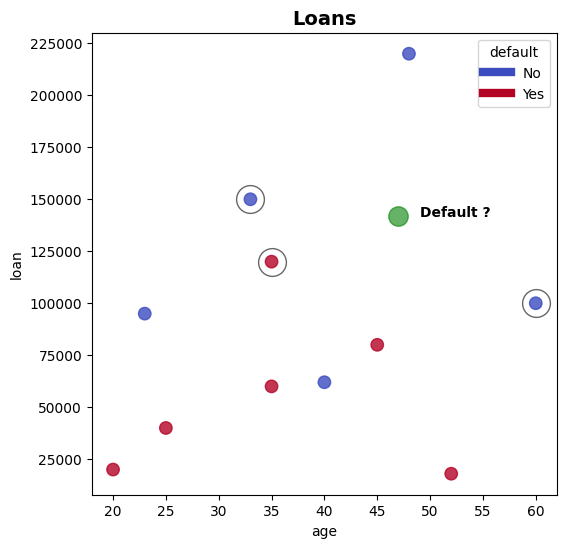

,age,loan,default,distance
10,33,150000,0,8000.0
4,35,120000,1,22000.0
8,60,100000,0,42000.0


In [ ]:
k3_neighbors = loans.nsmallest(3,'distance')

f, ax = plt.subplots(1,1,figsize=(6,6))
cmap_data = plt.cm.coolwarm

ax.scatter(k3_neighbors.age, k3_neighbors.loan, edgecolors='k', c='w', alpha=0.6, s=400)
ax.scatter(loans.age, loans.loan, c=loans.default, cmap=cmap_data, alpha=0.8, s=80)
ax.plot(case.age, case.loan, 'go', markersize=14, alpha=0.6)

plt.text(case.age+2, case.loan,'Default ?', weight='bold')
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("age")
plt.ylabel("loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['No', 'Yes'], loc='upper right',title='default')

plt.show()

display(k3_neighbors)

In [ ]:
from sklearn.preprocessing import minmax_scale

minmax_scale(loans[['age','loan']])

array([[0.125     , 0.10891089],
       [0.375     , 0.20792079],
       [0.625     , 0.30693069],
       [0.        , 0.00990099],
       [0.375     , 0.5049505 ],
       [0.8       , 0.        ],
       [0.075     , 0.38118812],
       [0.5       , 0.21782178],
       [1.        , 0.40594059],
       [0.7       , 1.        ],
       [0.325     , 0.65346535]])

Mas o uso de funções não permite aplicarmos a mesma regra de normalização em outros conjuntos de dados! ---> Não armazena o valor de max e minimo para poder realizar a conversão dos dados que queremos prever por exemplo

In [ ]:
minmax_scale(case)

array([[0., 0.]])

Neste caso, é melhor empregarmos um *estimador* do `scikit-learn`. O cálculo é o mesmo da função `minmaxscaler`, mas o uso de um estimador permite salvarmos os parâmetros empregados para a mesma aplicação em outros conjuntos de dados.

> *Na normalização de dados com o `scikit-learn` é preferível uso de estimadores no lugar de funções para que a mesma transformação possa ser efetuada em outros conjuntos de dados. O mesmo princípio se aplica a outras transformações, como os encodes.*

Vamos então aplicar o estimador `MinMaxScaler` no lugar da função.


Se considerarmos que o nosso modelo gera um bom resultado, podemos considerá-lo um modelo eficaz e aplicá-lo para novos casos hipotéticos.

> **Você deve notar agora que, como fizemos uma transformação dos dados das variáveis preditoras precisamos aplicar esta mesma transformação (a normalização!) nos valores dos novos casos. Como empregamos um estimador `scaler`, podemos empregar essa mesma transformação e você pode notar também que, se não tivéssemos empregado um estimador, não saberíamos como aplicar a mesma transformação! Essa a vantagem de empregarmos um estimador para isso!**

In [ ]:
# apenas mostrando o resultado do estimador
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler.fit(loans[['age','loan']]))

print(scaler.data_max_)

print(scaler.transform(loans[['age','loan']]))
print(scaler.transform(case))

MinMaxScaler()
[6.0e+01 2.2e+05]
[[0.125      0.10891089]
 [0.375      0.20792079]
 [0.625      0.30693069]
 [0.         0.00990099]
 [0.375      0.5049505 ]
 [0.8        0.        ]
 [0.075      0.38118812]
 [0.5        0.21782178]
 [1.         0.40594059]
 [0.7        1.        ]
 [0.325      0.65346535]]
[[0.675      0.61386139]]


In [ ]:
# criando os dados normalizados, 'scaled'
loans_scaled = pd.DataFrame(scaler.transform(loans[['age','loan']]),columns=loans.columns[0:2])
loans_scaled = pd.concat([loans_scaled,loans[['default']]],axis=1)
display(loans_scaled)

case_scaled = pd.DataFrame(scaler.transform(case),columns=case.columns[0:2])
display(case_scaled)

,age,loan,default
0,0.125,0.108911,1
1,0.375,0.207921,1
2,0.625,0.306931,1
3,0.000,0.009901,1
4,0.375,0.504950,1
5,0.800,0.000000,1
6,0.075,0.381188,0
7,0.500,0.217822,0
8,1.000,0.405941,0
9,0.700,1.000000,0


,age,loan
0,0.675,0.613861


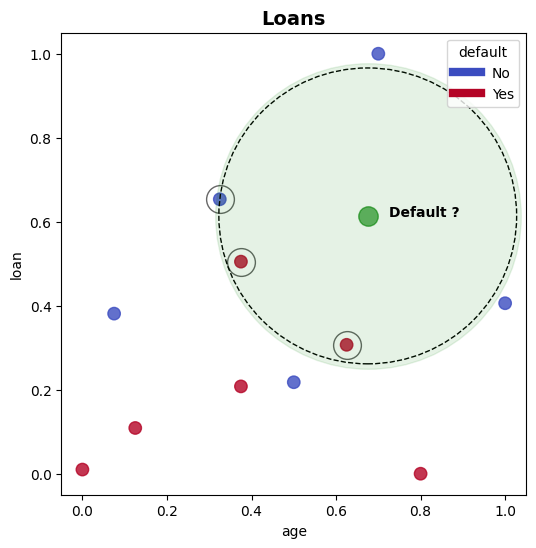

,age,loan,default,distance
2,0.625,0.306931,1,0.310977
4,0.375,0.504950,1,0.319158
10,0.325,0.653465,0,0.352234


In [ ]:
from sklearn.metrics import DistanceMetric

dist = DistanceMetric.get_metric('euclidean')
d = dist.pairwise(loans_scaled[['age','loan']],case_scaled[['age','loan']])

loans_scaled['distance'] = d

k3_neighbors_scaled = loans_scaled.nsmallest(3,'distance')

f, ax = plt.subplots(1,1,figsize=(6,6))
cmap_data = plt.cm.coolwarm

ax.plot(case_scaled.age, case_scaled.loan, 'go', markersize=220, alpha=0.10)
ax.scatter(k3_neighbors_scaled.age, k3_neighbors_scaled.loan, edgecolors='k', c='w', alpha=0.6, s=400)
ax.scatter(loans_scaled.age, loans_scaled.loan, c=loans_scaled.default, cmap=cmap_data, alpha=0.8, s=80)
ax.plot(case_scaled.age, case_scaled.loan, 'go', markersize=14, alpha=0.6)

a_circle = plt.Circle((case_scaled.age, case_scaled.loan), k3_neighbors_scaled.distance.max(), edgecolor='k', linestyle='dashed',fill=False)
ax.add_artist(a_circle)

plt.text(case_scaled.age+0.05, case_scaled.loan,'Default ?', weight='bold')
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("age")
plt.ylabel("loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['No', 'Yes'], loc='upper right',title='default')

plt.show()

display(k3_neighbors_scaled)

### 1. **Min-Max Scaling**

$$
X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

ou

$$
X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}} \times (\text{range}_{max} - \text{range}_{min}) + \text{range}_{min}
$$

- $X$: valor original.
- $X_{min}$: valor mínimo da variável.
- $X_{max}$: valor máximo da variável.
- $\text{range}_{min}$: limite inferior do intervalo de normalização, por padrão 0.
- $\text{range}_{max}$: limite superior do intervalo de normalização, por padrão 1.

### 2. **Standard Scaling (Z-Score Normalization)**

$$
X_{scaled} = \frac{X - \mu}{\sigma}
$$

- $X$: valor original.
- $\mu$: média da variável.
- $\sigma$: desvio padrão da variável.

### 3. **MaxAbs Scaling**

$$
X_{scaled} = \frac{X}{|X_{max}|}
$$

- $X$: valor original.
- $X_{max}$: valor absoluto máximo da variável.

### 4. **Robust Scaling**

$$
X_{scaled} = \frac{X - \text{median}}{IQR}
$$

- $X$: valor original.
- $\text{median}$: mediana da variável.
- $IQR$: intervalo interquartil (75º percentil - 25º percentil).

### 5. **Normalizer (Norma L2)**

$$
X_{scaled} = \frac{X}{\|X\|}
$$

- $X$: vetor original.
- $\|X\|$: norma L2 (comprimento) do vetor $X$.

In [ ]:
df = pd.read_csv('california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


### Outros nomalizadores

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Cria os scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Aplica os scalers
df_min_max = pd.DataFrame(min_max_scaler.fit_transform(df[['housing_median_age', 'total_bedrooms', 'households']]),
                         columns=['housing_median_age', 'total_bedrooms', 'households'])
df_scale = pd.DataFrame(standard_scaler.fit_transform(df[['housing_median_age', 'total_bedrooms', 'households']]),
                        columns=['housing_median_age', 'total_bedrooms', 'households'])
df_robust = pd.DataFrame(robust_scaler.fit_transform(df[['housing_median_age', 'total_bedrooms', 'households']]),
                         columns=['housing_median_age', 'total_bedrooms', 'households'])


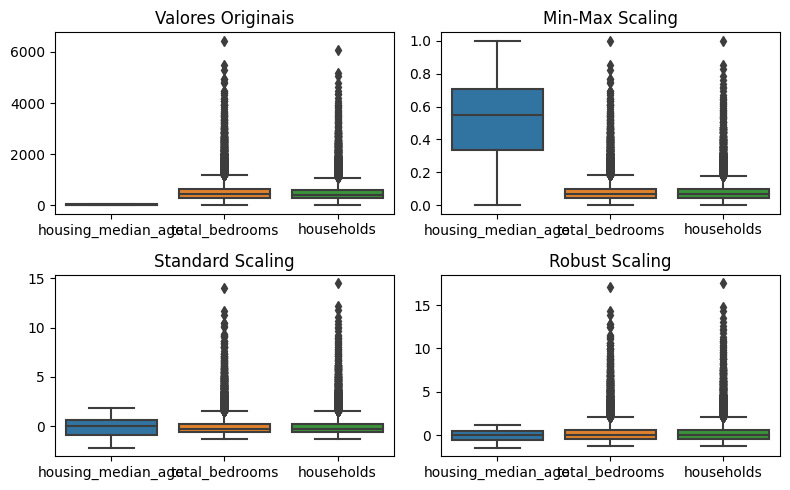

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8,5))

# Boxplot dos valores originais
sns.boxplot(data=df[['housing_median_age', 'total_bedrooms', 'households']], ax=axes[0, 0])
axes[0, 0].set_title('Valores Originais')

# Boxplot dos valores após Min-Max Scaling
sns.boxplot(data=df_min_max, ax=axes[0, 1])
axes[0, 1].set_title('Min-Max Scaling')

# Boxplot dos valores após Standard Scaling
sns.boxplot(data=df_scale, ax=axes[1, 0])
axes[1, 0].set_title('Standard Scaling')

# Boxplot dos valores após Robust Scaling
sns.boxplot(data=df_robust, ax=axes[1, 1])
axes[1, 1].set_title('Robust Scaling')

plt.tight_layout()
plt.show()


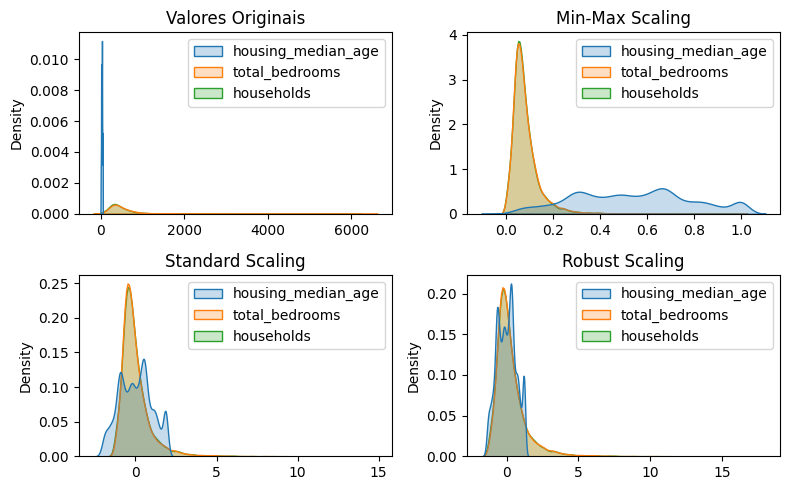

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8,5))

# Densidade dos valores originais
sns.kdeplot(data=df[['housing_median_age', 'total_bedrooms', 'households']], ax=axes[0, 0], fill=True)
axes[0, 0].set_title('Valores Originais')

# Densidade dos valores após Min-Max Scaling
sns.kdeplot(data=df_min_max, ax=axes[0, 1], fill=True)
axes[0, 1].set_title('Min-Max Scaling')

# Densidade dos valores após Standard Scaling
sns.kdeplot(data=df_scale, ax=axes[1, 0], fill=True)
axes[1, 0].set_title('Standard Scaling')

# Densidade dos valores após Robust Scaling
sns.kdeplot(data=df_robust, ax=axes[1, 1], fill=True)
axes[1, 1].set_title('Robust Scaling')

plt.tight_layout()
plt.show()


### StandardScaler

In [ ]:
df = pd.read_csv('california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:

# Cria os scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Aplica os scalers
df_min_max = pd.DataFrame(min_max_scaler.fit_transform(df[['housing_median_age', 'total_bedrooms', 'households']]),
                         columns=['housing_median_age', 'total_bedrooms', 'households'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

standard_scaler = StandardScaler()


df_scaled = pd.DataFrame(standard_scaler.fit_transform(df[['housing_median_age', 'total_bedrooms', 'households']]),
                        columns=['housing_median_age', 'total_bedrooms', 'households'])


# df_scaled = pd.DataFrame(standard_scaler.fit_transform(df_encoded.drop(columns='species')),
                        #  columns=df_encoded.drop(columns='species').columns)

df_scaled = pd.concat([df['median_house_value'], df_scaled], axis=1)
df_scaled.head()

,median_house_value,housing_median_age,total_bedrooms,households
0,66900.0,-1.079671,1.764204,-0.075998
1,80100.0,-0.761872,3.230441,-0.099404
2,85700.0,-0.920772,-0.866956,-0.999252
3,73400.0,-1.159121,-0.480230,-0.715774
4,65500.0,-0.682422,-0.506328,-0.622148


In [ ]:
df_scaled.describe() # a media dos valore normalizados é zero

,median_house_value,housing_median_age,total_bedrooms,households
count,17000.000000,1.700000e+04,1.700000e+04,1.700000e+04
mean,207300.912353,-7.606987e-17,-8.693699e-17,2.006238e-17
std,115983.764387,1.000029e+00,1.000029e+00,1.000029e+00
min,14999.000000,-2.191968e+00,-1.277408e+00,-1.300935e+00
25%,119400.000000,-8.413218e-01,-5.751323e-01,-5.701340e-01
50%,180400.000000,3.262582e-02,-2.500927e-01,-2.398431e-01
75%,265000.000000,6.682241e-01,2.582266e-01,2.705474e-01
max,500001.000000,1.859971e+00,1.401132e+01,1.451402e+01


### Inverse Transform!

In [ ]:
standard_scaler.inverse_transform(df_scaled.drop(columns="median_house_value"))

array([[  15., 1283.,  472.],
       [  19., 1901.,  463.],
       [  17.,  174.,  117.],
       ...,
       [  17.,  531.,  456.],
       [  19.,  552.,  478.],
       [  52.,  300.,  270.]])

In [ ]:
voltando = pd.DataFrame(standard_scaler.inverse_transform(df_scaled.drop(columns="median_house_value")),
                         columns=df_scaled.drop(columns="median_house_value").columns)
voltando

,housing_median_age,total_bedrooms,households
0,15.0,1283.0,472.0
1,19.0,1901.0,463.0
2,17.0,174.0,117.0
3,14.0,337.0,226.0
4,20.0,326.0,262.0
...,...,...,...
16995,52.0,394.0,369.0
16996,36.0,528.0,465.0
16997,17.0,531.0,456.0
16998,19.0,552.0,478.0


In [ ]:
df = pd.read_csv('california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


### Quando e qual normalização empregar?

> **Preciso normalizar?**
> 1. Quanto menos interferirmos (quanto menos *botamos a mão*) nos dados, melhor
> 2. Nem todos algoritmos empregam os valores e/ou distância e, portanto, a normalização pode não ser necessária
> 3. A preparação dos dados pode envolver outras etapas que podem influenciar no tipo de normalização, como a exclusão de outliers

> **Decidi por normalizar. Que algoritmo empregar?**
> 1. Nenhum algoritmo é *melhor* a priori (ou só teríamos um :-))
> 2. Dependem de muitos fatores como dos dados (outliers, distribuição, valores mínimos e máximos etc.), do modelo de aprendizado e tarefa a ser realizado, função distância empregada etc. também não há uma concordância dos autores sobre técnicas de normalização e modelos a empregar. O melhor, portanto, é experimentar os diferentes métodos e resultados.

De qualquer modo, o Min-Max Scaling é útil para algoritmos sensíveis à escala dos dados e que empregam distância. O Standard Scaling é mais adequado para algoritmos que assumem uma distribuição normal dos dados. Mas ambos são bastante sensíveis a outliers. O Robust Scaling é ideal quando há muitos outliers nos dados, e o Normalizer é mais comum em tarefas de aprendizado não supervisionado, como clustering.

Na prática, os métodos mais comuns empregados são o **Min-Max Scaling** e o **Standard Scaling**.

## Separando os dados de treino e de Teste

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

***O parâmetro stratify=y indica que os conjuntos de treinamento e teste manterão a mesma proporção dos valores do atributo objetivo y. Os parâmetros test_size=0.3 indica o percentual (30%) dos dados que será empregado para teste. Esse valor varia, em geral, de 20-30% dos dados. Por fim, o parâmetro random_state=123 é para a reprodutibilidade dos resultados.***

In [ ]:
from sklearn.datasets import make_moons


In [ ]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)
df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['x1','x2']]
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

# O parâmetro stratify=y indica que os conjuntos de treinamento e teste manterão a mesma proporção dos valores do atributo objetivo y. Os parâmetros test_size=0.3 indica o percentual (30%) dos dados que será empregado para teste. Esse valor varia, em geral, de 20-30% dos dados. Por fim, o parâmetro random_state=123 é para a reprodutibilidade dos resultados.

clf = LogisticRegression(max_iter=1000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( clf.score(X_test,y_test) )


[0 1 0 0 0 0 1 1 0 1] ...
0.9333333333333333


## Ver dados numericos

In [ ]:
# Seleção das colunas numéricas
dfnum = df.select_dtypes(include=np.number)
dfnum.head()

,areaM2,suites,dormitorios,banheiros,vagas,preco
0,32,1,1,1,1,490000
1,157,2,2,2,2,3180000
2,205,2,3,3,3,1900000
3,193,3,3,3,3,3565000
4,116,1,3,2,2,1605000


# Regressão Linear


In [4]:
# Dados
df = pd.read_excel('http://meusite.mackenzie.br/rogerio/data_load/regressao_preco_imoveis.xlsx')
df.head()

,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
0,vila-nova-conceicao,32,1,1,1,1,490000
1,vila-nova-conceicao,157,2,2,2,2,3180000
2,vila-nova-conceicao,205,2,3,3,3,1900000
3,vila-nova-conceicao,193,3,3,3,3,3565000
4,vila-nova-conceicao,116,1,3,2,2,1605000


In [5]:
# Seleção das colunas numéricas
dfnum = df.select_dtypes(include=np.number)
dfnum.head()

,areaM2,suites,dormitorios,banheiros,vagas,preco
0,32,1,1,1,1,490000
1,157,2,2,2,2,3180000
2,205,2,3,3,3,1900000
3,193,3,3,3,3,3565000
4,116,1,3,2,2,1605000


## Definição de mondelo usando o statsmodel

In [7]:
# Definição do modelo
# modelo = sm.ols( o_que_queremos_prever ~ colunas_utilizadas_para_isso + colunas + colunas)
lm = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + banheiros + vagas', data=dfnum)

# Treinamento
lm = lm.fit()

# Resultados
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1623.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:10:11   Log-Likelihood:                -55098.
No. Observations:                3741   AIC:                         1.102e+05
Df Residuals:                    3735   BIC:                         1.102e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1713.8448   4.06e+04      0.042      

> Valores abaixo de 0.05 são significativos


> Para retirar o intercept temos que colocar `-1` nas colunas de dados, exemplo:
>
> `lm = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas - 1', data=dfnum)`

> O statsmodel consegue criar modelos com colunas categóricas, como bairro:
>
>`lm_all = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas + bairro', data=df)`
>
> Apesar de cada "bairro" ter uma significância diferente, não podemos separá-los.
> A API statsmodels automaticamente cria variáveis dummy para a variável categórica 'bairro'.
>
> Cada bairro, exceto um (que serve como referência), terá uma variável dummy associada.
>
> Os coeficientes dessas variáveis dummy indicam o impacto de cada bairro no preço em relação ao bairro de referência.

### Coeficientes

Não podemos afirmar que uma varíavel com **coeficiente maior em termos absolutos é mais influente**, pois para determinar precisamos normalizar os atributos.

Exemplo: um valor muito baixo de coluna precisa de um coeficiente muito alto para ter impacto na regressão, se tornando "artificialmente" mais influente.

Portanto para determinar precisamos deixar todos os valores na mesma escala.

### Predição de valores

In [9]:
# seu código
# Definição do modelo
# Menor que 0.05 é significativo
# Significativo = areaM2, suites, dormitorios, vagas
lm = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas - 1', data=dfnum)

# Treinamento
lm = lm.fit()

# Resultados
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              8233.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):                        0.00
Time:                        12:13:46   Log-Likelihood:                         -55099.
No. Observations:                3741   AIC:                                  1.102e+05
Df Residuals:                    3737   BIC:                                  1.102e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [10]:
x = pd.DataFrame({'areaM2': [134],
                  'suites': [1],
                  'dormitorios': [4],
                  'vagas': [2]})
preco_estimado = lm.predict(x)[0]

print(f'Preço estimado: {preco_estimado:.2f}')

Preço estimado: 949268.27


### Normalização

In [12]:
# Normalização dos dados
dfnorm = dfnum / dfnum.max()
dfnorm.head()

,areaM2,suites,dormitorios,banheiros,vagas,preco
0,0.107023,0.166667,0.166667,0.111111,0.2,0.061250
1,0.525084,0.333333,0.333333,0.222222,0.4,0.397500
2,0.685619,0.333333,0.500000,0.333333,0.6,0.237500
3,0.645485,0.500000,0.500000,0.333333,0.6,0.445625
4,0.387960,0.166667,0.500000,0.222222,0.4,0.200625


In [13]:
# Treinamento normalizado
lmnorm = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas - 1', data=dfnorm)

# Treinamento
lmnorm = lmnorm.fit()

# Resultados
print(lmnorm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              8233.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):                        0.00
Time:                        12:19:03   Log-Likelihood:                          4363.9
No. Observations:                3741   AIC:                                     -8720.
Df Residuals:                    3737   BIC:                                     -8695.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

> Agora podemso afirmar que a área (`areaM2`) influencia mais no preço.

In [14]:
# Predição Normalizada
xnorm = x / dfnum.max()
preco_estimado_norm = lmnorm.predict(xnorm)[0]
print(f'Preço estimado normalizado: {preco_estimado_norm:.2f}')


Preço estimado normalizado: 0.12


In [15]:
# Desnormalizar o preço
preco_estimado_desnorm = preco_estimado_norm * dfnum['preco'].max()
print(f'Preço estimado desnormalizado: {preco_estimado_desnorm:.2f}')

Preço estimado desnormalizado: 949268.27


#### Minmax e Standard Scaler

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# MinMaxScaler
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
scaler_minmax = scaler_minmax.fit(df_minmax[['areaM2', 'suites', 'dormitorios', 'vagas']])
df_minmax[['areaM2', 'suites', 'dormitorios', 'vagas']] = scaler_minmax.transform(df_minmax[['areaM2', 'suites', 'dormitorios', 'vagas']])

# StandardScaler
scaler_standard = StandardScaler()
df_stdscale = df.copy()
scaler_standard = scaler_standard .fit(df_stdscale[['areaM2', 'suites', 'dormitorios', 'vagas']])
df_stdscale[['areaM2', 'suites', 'dormitorios', 'vagas']] = scaler_standard.transform(df_stdscale[['areaM2', 'suites', 'dormitorios', 'vagas']])

In [17]:
lm = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas - 1', data=df_minmax)
lm = lm.fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              7805.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):                        0.00
Time:                        12:24:31   Log-Likelihood:                         -55188.
No. Observations:                3741   AIC:                                  1.104e+05
Df Residuals:                    3737   BIC:                                  1.104e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [20]:
df_case = pd.DataFrame()
df_case['areaM2'] = [134]
df_case['suites'] = [1]
df_case['dormitorios'] = [4]
df_case['vagas'] = [2]

df_case_minmax = scaler_minmax.transform(df_case)
df_case_minmax

array([[0.40860215, 0.        , 0.6       , 0.25      ]])

In [21]:
df_case_minmax = pd.DataFrame(df_case_minmax, columns=['areaM2', 'suites', 'dormitorios', 'vagas'])
df_case_minmax

,areaM2,suites,dormitorios,vagas
0,0.408602,0.0,0.6,0.25


In [22]:
preco = lm.predict(df_case_minmax)

print()
print(f'Preco estimado: {preco[0]:.2f}')


Preco estimado: 1085921.06


### Problemas nos Dados

A normalização das variáveis preditoras pode afetar as previsões de um modelo de regressão linear, embora o impacto direto nas previsões em si não seja significativo. De qualquer modo isso pode ser um problema em muitos casos, de diferenças significativas, quando temos os dados sem algumas atender algunmas premissas do modelo, como a presença de outliers, heterocedasticidade etc. Veja, por exemplo, no caso desses dados a normalização standard scale.

#### Gráfico dos dados para verificar os aspectos de outliers e homocedasticidade dos dados.

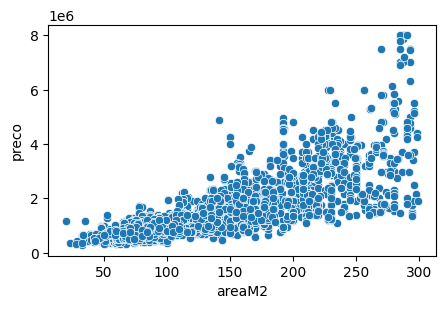

In [23]:
# Homocedasticidade
plt.figure(figsize=(5,3))

sns.scatterplot(x=df.areaM2, y=df.preco)
plt.show()

> A solução para Homocedasticidade (na maior parte dos casos) é aplicar o log nos valores.

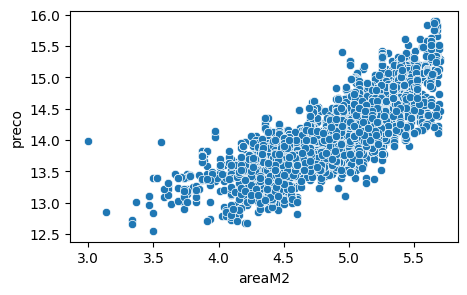

In [25]:
# Solucção para Homocedasticidade
plt.figure(figsize=(5,3))

sns.scatterplot(x=np.log(df.areaM2), y=np.log(df.preco))
plt.show()

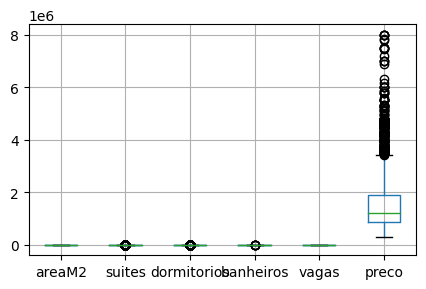

In [24]:
# Outliers
plt.figure(figsize=(5,3))

df.boxplot(figsize=(10,6))
plt.show()


## Definição do modelo usando o Scikit-learn

In [26]:
from sklearn import linear_model

x = df[['areaM2', 'suites', 'dormitorios', 'vagas']]
y = df['preco']
# regressor = linear_model.LinearRegression()
regressor = linear_model.LinearRegression(fit_intercept=False) # para tirar o intercept
regressor.fit(x, y)

y_pred = regressor.predict(x)
print(y_pred)
print('Coeficientes:', regressor.coef_)
print('Intercept', regressor.intercept_)
print('R2:', regressor.score(x,y)) # ele sempre retorna o R2 com o intercept

[ 522035.93385151 2017896.71041794 2504559.33606312 ... 1251235.51913646
 2236266.83310028 1740831.53026522]
Coeficientes: [  10471.2348679   202913.06609277 -312438.48835905  296481.84034491]
Intercept 0.0
R2: 0.6845683088812347


> O Sciket-learn sempre mostra o R2 com o intercept

> A diferença entre os modelos se dá pois o statsmodels usa o método dos mínimos quadrados (MQO) para encontrar os coeficientes da regressão, enquanto o scikit-learn usa outros métodos de otimização, que podem levar a resultados ligeiramente diferentes.


In [27]:
df_case = pd.DataFrame({'areaM2': [134],
                        'suites': [1],
                        'dormitorios': [4],
                        'vagas': [2]})

In [28]:
regressor.predict(df_case)

array([949268.26564532])

> O Scikit-learn não consegue trabalhar com colunas categóricas por padrão, para usálo é preciso criar uma coluna binária de cada bairro nos dados:
>
> ```
Vila Mariana | Vila Nova Conceição
     0       |          1
     1       |          0
```

# Regressão Linear Robusta

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Regressão com Termos de Interação
Um conceito importante na análise de regressão é o de termos de interação. Os termos de interação permitem examinar como a relação entre o alvo e a variável independente muda dependendo do valor de outra variável independente.

In [31]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# settings
plt.style.use("seaborn")
sns.set_palette("colorblind")
plt.rcParams["figure.figsize"] = (16, 8)


<ipython-input-31-e266fb4ce48c>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [36]:
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True)
print(mtcars.__doc__)

.. container::

   .. container::

      ====== ===============
      mtcars R Documentation
      ====== ===============

      .. rubric:: Motor Trend Car Road Tests
         :name: motor-trend-car-road-tests

      .. rubric:: Description
         :name: description

      The data was extracted from the 1974 *Motor Trend* US magazine,
      and comprises fuel consumption and 10 aspects of automobile design
      and performance for 32 automobiles (1973–74 models).

      .. rubric:: Usage
         :name: usage

      .. code:: R

         mtcars

      .. rubric:: Format
         :name: format

      A data frame with 32 observations on 11 (numeric) variables.

      ===== ======== ========================================
      [, 1] ``mpg``  Miles/(US) gallon
      [, 2] ``cyl``  Number of cylinders
      [, 3] ``disp`` Displacement (cu.in.)
      [, 4] ``hp``   Gross horsepower
      [, 5] ``drat`` Rear axle ratio
      [, 6] ``wt``   Weight (1000 lbs)
      [, 7] ``qsec`` 1/4 mi

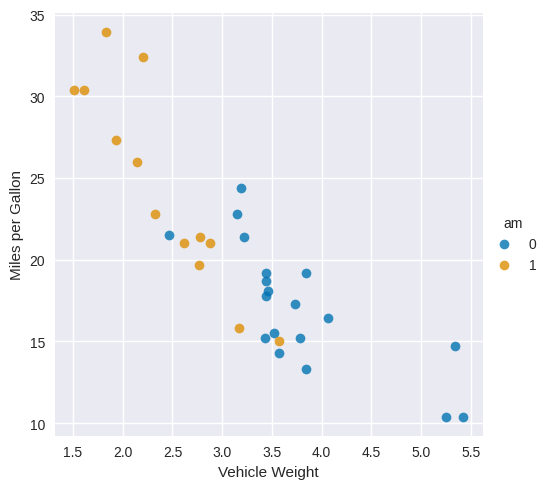

In [37]:
df = mtcars.data
df.head()
sns.lmplot(x="wt", y="mpg", hue="am", data=df, fit_reg=False)
plt.ylabel("Miles per Gallon")
plt.xlabel("Vehicle Weight");

In [38]:
model_1 = smf.ols(formula="mpg ~ wt + am", data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     44.17
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           1.58e-09
Time:                        13:53:29   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      29   BIC:                             170.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.3216      3.055     12.218      0.000      31.074      43.569
wt            -5.3528      0.788     -6.791      0.000      -6.965      -3.741
am            -0.0236      1.546     -0.015      0.988      -3.185       3.138
==============================================================================
Omnibus:                        3.009   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                2.413
Skew:                           0.670   Prob(JB):                        0.299
Kurtosis:                       2.881   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interação:

In [39]:
# A interação a*b é representada como a:b
model_2 = smf.ols(formula="mpg ~ wt + am + wt:am", data=df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     46.57
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           5.21e-11
Time:                        13:53:51   Log-Likelihood:                -73.738
No. Observations:                  32   AIC:                             155.5
Df Residuals:                      28   BIC:                             161.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.4161      3.020     10.402      0.000      25.230      37.602
wt            -3.7859      0.786     -4.819      0.000      -5.395      -2.177
am            14.8784      4.264      3.489      0.002       6.144      23.613
wt:am         -5.2984      1.445     -3.667      0.001      -8.258      -2.339
==============================================================================
Omnibus:                        3.839   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                3.088
Skew:                           0.761   Prob(JB):                        0.213
Kurtosis:                       2.963   Cond. No.                         40.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_excel('http://meusite.mackenzie.br/rogerio/data_load/regressao_preco_imoveis.xlsx')
df = df.drop(columns='bairro')
df.head()

,areaM2,suites,dormitorios,banheiros,vagas,preco
0,32,1,1,1,1,490000
1,157,2,2,2,2,3180000
2,205,2,3,3,3,1900000
3,193,3,3,3,3,3565000
4,116,1,3,2,2,1605000


### Statsmodel

In [20]:
# Modelo de regreção com iteração (dormitorios+suites e areaM2+vagas
lm_inter = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas + dormitorios:vagas + areaM2:vagas -1', data=df)
lm_inter = lm_inter.fit()
print(lm_inter.summary())
print()

calculate_metrics(df.preco, lm_inter.predict(df.drop(columns='preco')))
print()

df_case = pd.DataFrame({'areaM2':[134], 'suites':[1], 'dormitorios':[4], 'vagas':[2]})
df_case

preco_inter = lm_inter.predict(df_case)
print()
print(f'Preço estimado: {preco_inter[0]:.2f}')

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                              6100.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):                        0.00
Time:                        22:34:05   Log-Likelihood:                         -54920.
No. Observations:                3741   AIC:                                  1.099e+05
Df Residuals:                    3735   BIC:                                  1.099e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### Scikit-learn

In [21]:
df['dormitorios:suites'] = df[ 'dormitorios'] * df['suites']
df['areaM2:vagas'] = df['areaM2'] * df['vagas']

df_case['dormitorios:suites'] = df_case['dormitorios'] * df_case['suites']
df_case['areaM2:vagas'] = df_case['areaM2'] * df_case['vagas']

display(df.head())
display(df_case)

,areaM2,suites,dormitorios,banheiros,vagas,preco,dormitorios:suites,areaM2:vagas
0,32,1,1,1,1,490000,1,32
1,157,2,2,2,2,3180000,4,314
2,205,2,3,3,3,1900000,6,615
3,193,3,3,3,3,3565000,9,579
4,116,1,3,2,2,1605000,3,232


,areaM2,suites,dormitorios,vagas,dormitorios:suites,areaM2:vagas
0,134,1,4,2,4,268


In [23]:
X = df.drop(columns=['preco','banheiros','dormitorios'])
y = df['preco']

model = LinearRegression(fit_intercept=False) # set fit_intercept to False
model.fit(X, y)

print("Coeficientes: ", model.feature_names_in_)
print("Coeficientes: ", dict(zip(model.feature_names_in_, model.coef_)))
print("Intercept: ", model.intercept_)
print("Score (R2): ", model.score(X, y)) # R2
print()

# from sklearn.metrics import r2_score
# print("Score (R2)B: ", r2_score(y, model.predict(df.drop(columns=['preco','banheiros','dormitorios']))))

# está removendo apenas as colunas que não vai usar no treinamento
calculate_metrics(df.preco, model.predict(df.drop(columns=['preco','banheiros','dormitorios'])))
print()

# Predição
y_pred = model.predict(df_case.drop(columns='dormitorios'))
print(f'Preço estimado (scikit-learn): {y_pred[0]:.2f}')

Coeficientes:  ['areaM2' 'suites' 'vagas' 'dormitorios:suites' 'areaM2:vagas']
Coeficientes:  {'areaM2': 3588.4399521448354, 'suites': 606383.2763916976, 'vagas': -91523.06646181596, 'dormitorios:suites': -129541.37263719193, 'areaM2:vagas': 2563.087340982631}
Intercept:  0.0
Score (R2):  0.7034378664247192

MSE: 341735899922.54
RMSE: 584581.82
MAPE: 25.25
MAE: 380329.39
sMAPE: 23.00
MAD: 773278.64

Preço estimado (scikit-learn): 1072930.01


# Regressores Não Lineares


Existem muitos outros modelos e que empregam paradigmas bastante diferentes do modelo Linear e permitem obter aproximações *não lineares* dos dados. Você pode por exemplo pensar que podemos aproximar uma função por diferentes polinômios, com diferentes graus, ou ainda por diferentes combinações de séries de dados como as séries de Taylor e Fourier, famosas séries para aproximação de funções na matemática.

Para nós é suficiente saber que existem muitos modelos e que, por partirem de princípios de construção diferentes, levam a diferentes soluções de aproximação da função original.

Você pode ver abaixo a aplicação de 3 modelos regressores bastante empregados o **Decision Tree Regressor**, um modelo baseado em **Máquinas de Vetores de Suporte** e **XGBoosting Regressor**. Todos tem a mesma lógica de aplicação dos estimadores do scikit-learn e da regressão linear. Você pode ainda alterar o código abaixo para experimentar outros modelos que encontram-se nos imports no início do código.


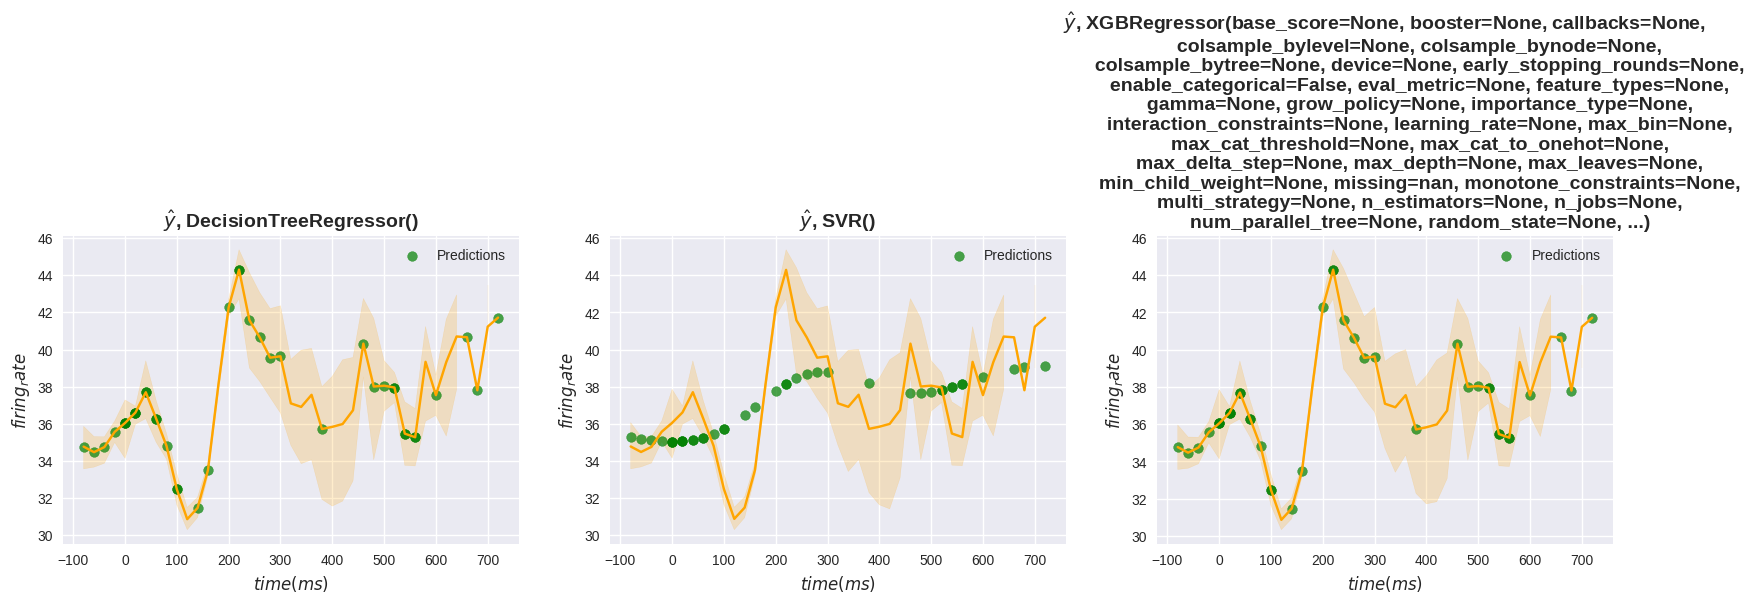

In [45]:
import seaborn as sns
df = sns.load_dataset('dots')
df = df[(df.choice == 'T2') & (df['align'] == 'dots')]
df = df[['time','firing_rate']].reset_index(drop=True)
df.head()

from sklearn import linear_model
from sklearn.model_selection import train_test_split

X = df[['time']]
y = df.firing_rate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor # entradas precisam ser normalizadas

base_estimators = [ DecisionTreeRegressor(),
                    SVR(),
                    XGBRegressor() ]

# Outros regressores
# base_estimators = [ MLPRegressor(max_iter=8000),
#                     DecisionTreeRegressor(),
#                     SVR(),
#                     XGBRegressor() ]

plt.figure(figsize=(20,4))
k = 1
for regressor in base_estimators:

  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)

  plt.subplot(1,3,k)
  k = k + 1
  sns.lineplot(x=X_train.time,y=y_train,color='orange')
  plt.scatter(X_test,y_pred,color='green',marker='o',alpha=0.7,label='Predictions')

  plt.title('$\\hat{y}$, ' + str(regressor),fontsize=14,weight='bold')
  plt.xlabel('$time (ms)$',fontsize=12)
  plt.ylabel('$firing_rate$',fontsize=12)
  plt.legend()

plt.show()

> O melhor modelo é definido pela melhor métrica de MSE (Mean Square Error)

In [26]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.drop(columns=['longitude', 'latitude'], inplace=True)
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [28]:
df_case = pd.DataFrame(df.mean()).transpose()
df_case = df_case.drop(columns='median_house_value')
df_case

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578


In [29]:
# Usando o modelo linear
X = df.drop(columns='median_house_value')
y = df.median_house_value

model = LinearRegression()
model.fit(X, y)

print("Coeficientes: ", dict(zip(model.feature_names_in_, model.coef_)))
print("Intercept: ", model.intercept_)
print("Score (R2): ", model.score(X, y)) # R2
print()

calculate_metrics(df.median_house_value, model.predict(X))
print()

# Predição
y_pred = model.predict(df_case)
print(f'Preço estimado (scikit-learn): {y_pred[0]:.2f}')

Coeficientes:  {'housing_median_age': 1880.014082669211, 'total_rooms': -19.95592072869588, 'total_bedrooms': 99.52477155165701, 'population': -35.01823468644445, 'households': 127.22531956281557, 'median_income': 48033.45927674914}
Intercept:  -47624.111719429085
Score (R2):  0.5713482748283873

MSE: 5765983945.18
RMSE: 75934.08
MAPE: 34.26
MAE: 55842.53
sMAPE: 29.28
MAD: 91645.59

Preço estimado (scikit-learn): 207300.91


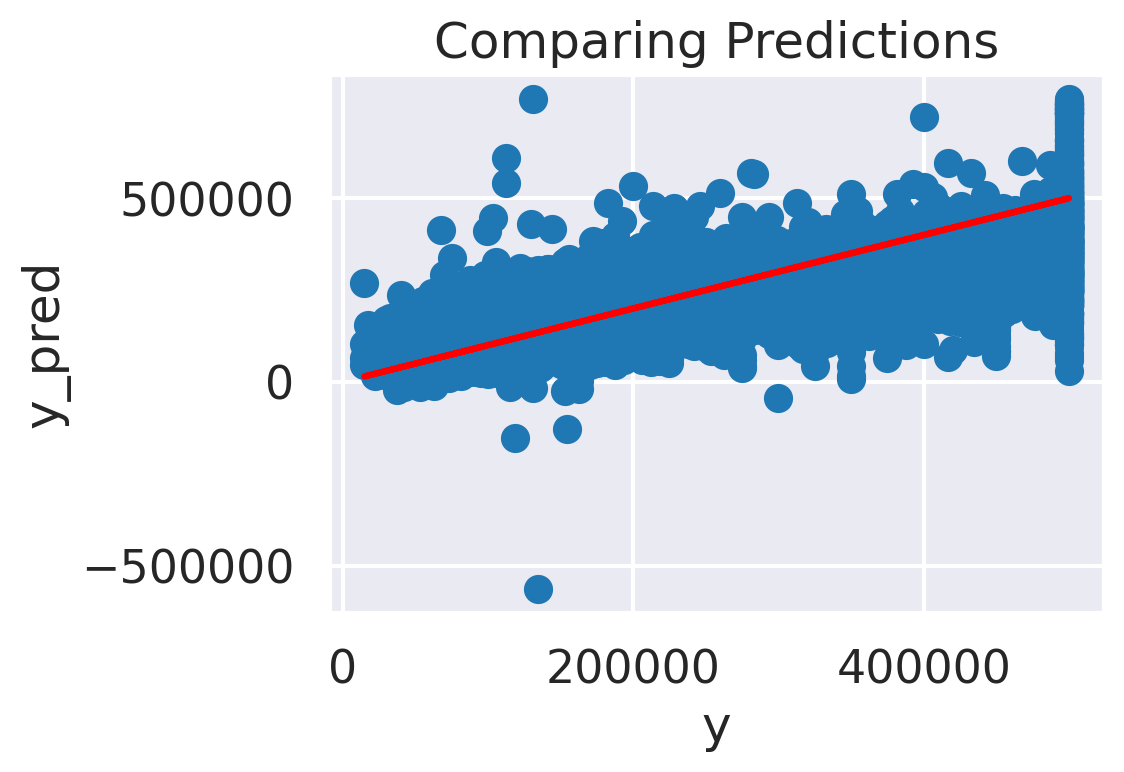

In [30]:
plt.figure(figsize=(5,3.5))

plt.scatter(y,model.predict(X))
plt.plot(y,y,color='r')

plt.xlabel('y')
plt.ylabel('y_pred')
plt.title('Comparing Predictions')

plt.show()


In [31]:
# Usando modelo não linear
from sklearn.tree import DecisionTreeRegressor

X = df.drop(columns='median_house_value')
y = df.median_house_value

model = DecisionTreeRegressor()
model.fit(X, y)

print("Score (R2): ", model.score(X, y)) # R2
print()

calculate_metrics(df.median_house_value, model.predict(X))
print()

# Predição
y_pred = model.predict(df_case)
print(f'Preço estimado (scikit-learn): {y_pred[0]:.2f}')

Score (R2):  1.0

MSE: 0.00
RMSE: 0.00
MAPE: 0.00
MAE: 0.00
sMAPE: 0.00
MAD: 91645.59

Preço estimado (scikit-learn): 174200.00


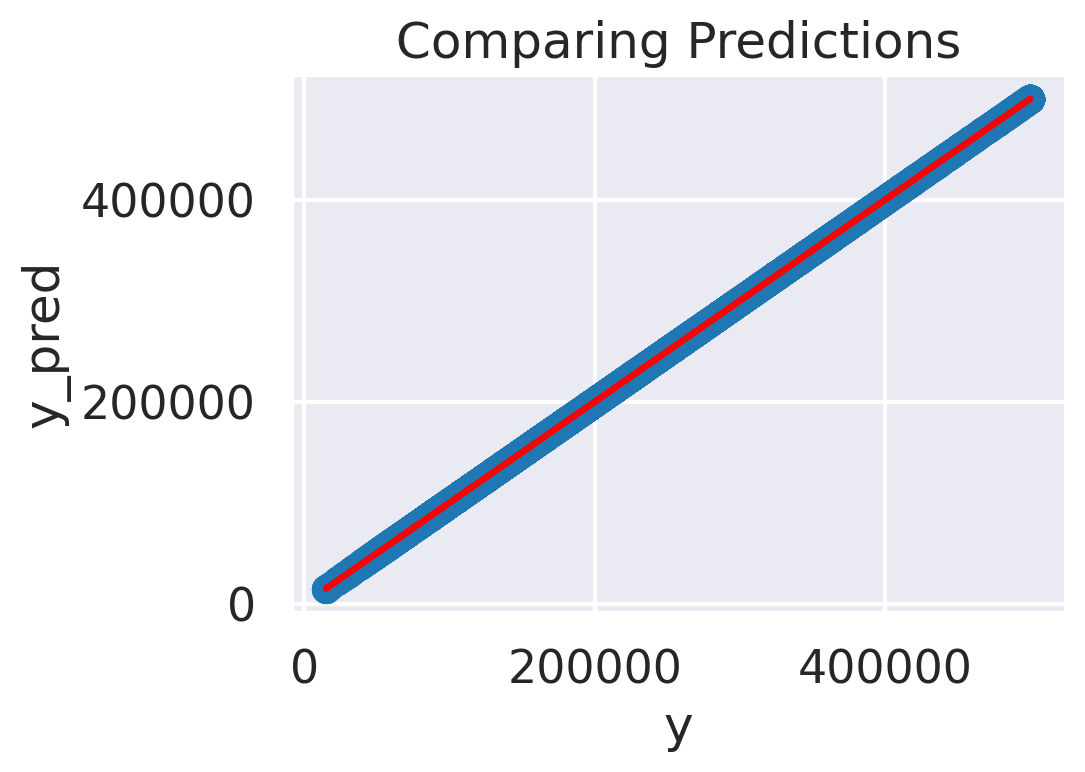

In [32]:
plt.figure(figsize=(5,3.5))

plt.scatter(y,model.predict(X))
plt.plot(y,y,color='r')

plt.xlabel('y')
plt.ylabel('y_pred')
plt.title('Comparing Predictions')

plt.show()

## Combatendo Outliers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import (LinearRegression, HuberRegressor,
                                  RANSACRegressor, TheilSenRegressor)

# settings
sns.set_theme(context="talk", palette="tab10", color_codes=True, rc={"figure.figsize": [7, 4]})
%config InlineBackend.figure_format = "retina"

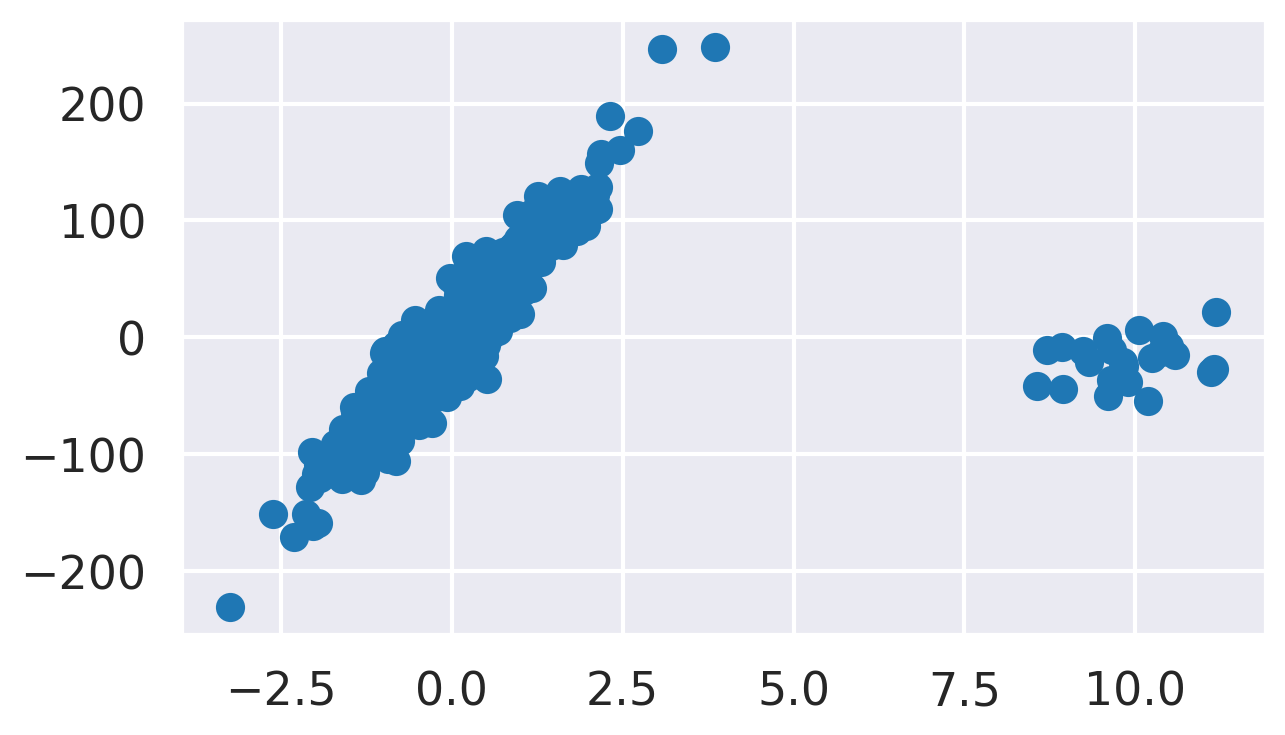

In [2]:
N_SAMPLES = 500
N_OUTLIERS = 25

X, y, coef = datasets.make_regression(
    n_samples=N_SAMPLES,
    n_features=1,
    n_informative=1,
    noise=20,
    coef=True,
    random_state=42
)

coef_list = [["original_coef", float(coef)]]

# add outliers
np.random.seed(42)
X[:N_OUTLIERS] = 10 + 0.75 * np.random.normal(size=(N_OUTLIERS, 1))
y[:N_OUTLIERS] = -15 + 20 * np.random.normal(size=N_OUTLIERS)

plt.scatter(X, y);

In [5]:
lr = LinearRegression().fit(X, y)
coef_list.append(["linear_regression", lr.coef_[0]])

plotline_X = np.arange(X.min(), X.max()).reshape(-1, 1)

fit_df = pd.DataFrame(
    index = plotline_X.flatten(),
    data={"linear_regression": lr.predict(plotline_X)}
)

fit_df

,linear_regression
-3.241267,-34.417132
-2.241267,-25.644817
-1.241267,-16.872502
-0.241267,-8.100187
0.758733,0.672128
1.758733,9.444443
2.758733,18.216758
3.758733,26.989073
4.758733,35.761388
5.758733,44.533703


### Huber Regression
A regressão de Huber é um exemplo de um algoritmo de regressão robusto que atribui menos peso a observações identificadas como outliers.


In [8]:
huber = HuberRegressor().fit(X, y)
fit_df["huber_regression"] = huber.predict(plotline_X)
coef_list.append(["huber_regression", huber.coef_[0]])

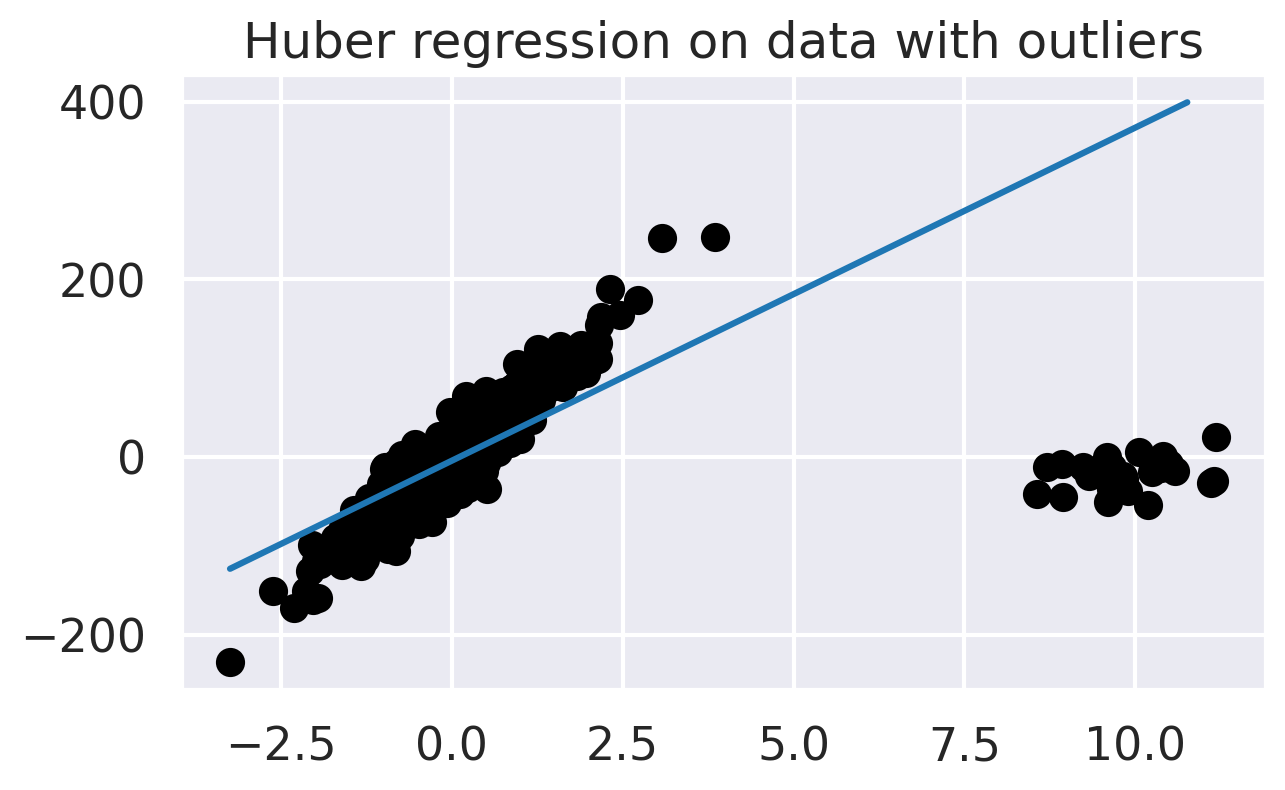

In [7]:
fix, ax = plt.subplots()
fit_df["huber_regression"].plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("Huber regression on data with outliers");

### RANSAC Regression

A regressão de consenso de amostra aleatória (RANSAC) é um algoritmo não determinístico que tenta separar os dados de treinamento em inliers (que podem estar sujeitos a ruído) e outliers. Então, ele estima o modelo final usando apenas os inliers.

Com a regressão RANSAC, você também pode inspecionar as observações que o modelo considerou como inliers e outliers.

In [9]:
ransac = RANSACRegressor(random_state=42).fit(X, y)
fit_df["ransac_regression"] = ransac.predict(plotline_X)
ransac_coef = ransac.estimator_.coef_
coef_list.append(["ransac_regression", ransac.estimator_.coef_[0]])

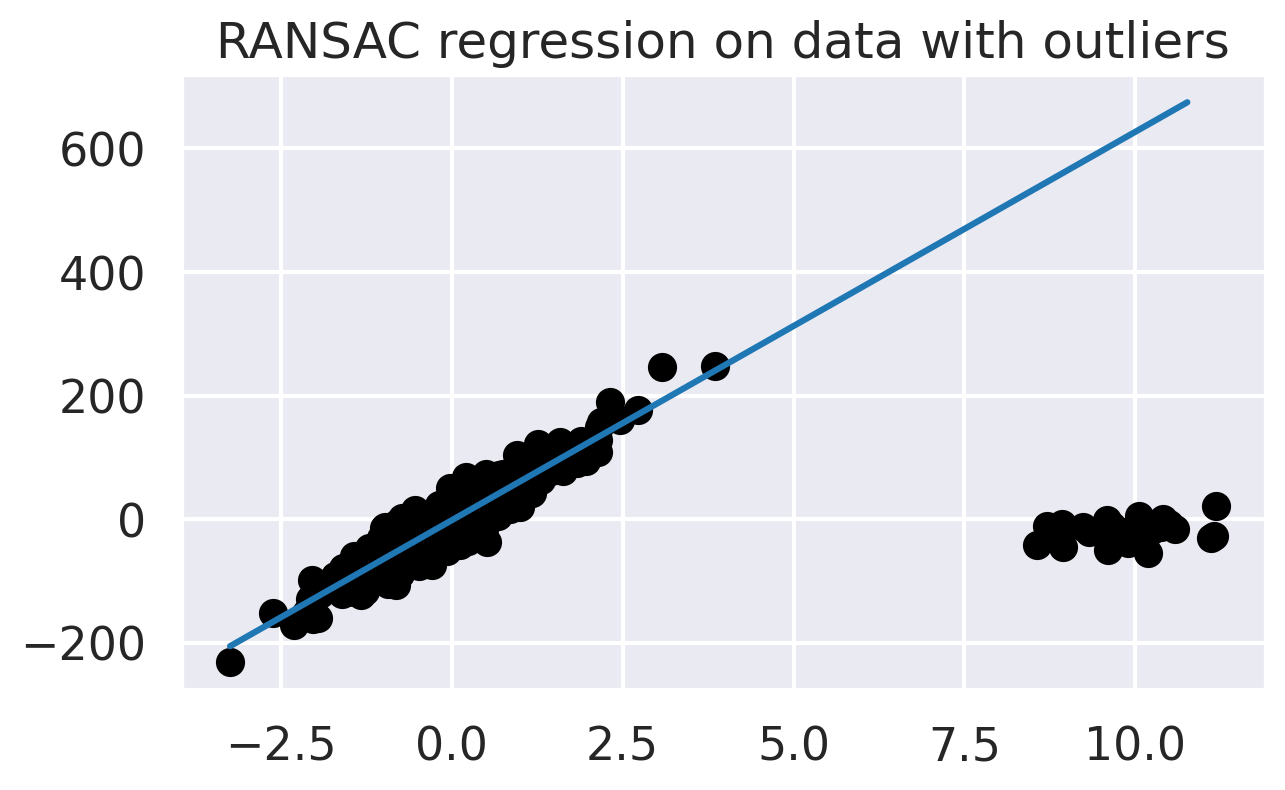

In [10]:
fix, ax = plt.subplots()
fit_df["ransac_regression"].plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("RANSAC regression on data with outliers");

In [11]:
inlier_mask = ransac.inlier_mask_
outlier_mask = ~inlier_mask
print(f"Total outliers: {sum(outlier_mask)}")
print(f"Outliers we have added ourselves: {sum(outlier_mask[:N_OUTLIERS])} / {N_OUTLIERS}")

Total outliers: 51
Outliers we have added ourselves: 25 / 25


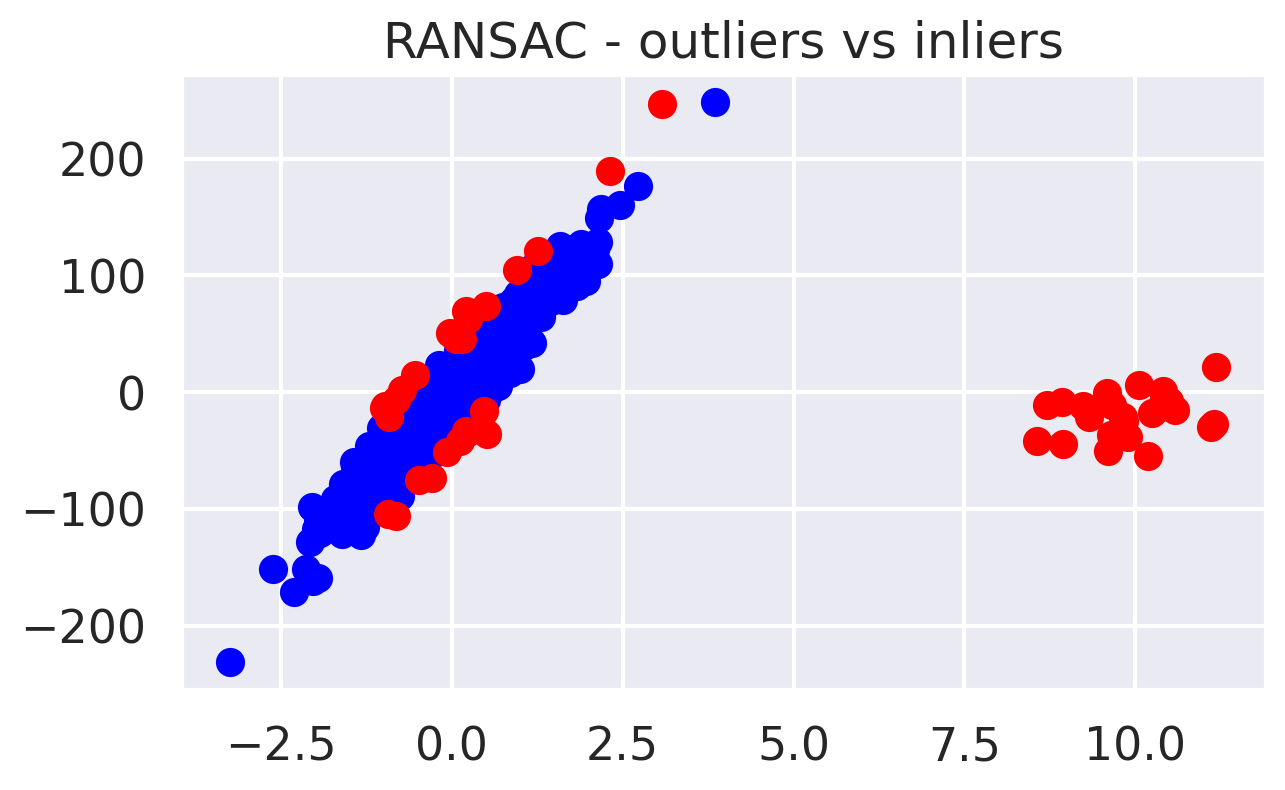

In [12]:
plt.scatter(X[inlier_mask], y[inlier_mask], color="blue", label="Inliers")
plt.scatter(X[outlier_mask], y[outlier_mask], color="red", label="Outliers")
plt.title("RANSAC - outliers vs inliers");

### Theil-Sen

O último dos algoritmos de regressão robustos disponíveis scikit-learné a regressão Theil-Sen . É um método de regressão não paramétrico, o que significa que não faz nenhuma suposição sobre a distribuição de dados subjacente. Em resumo, envolve ajustar vários modelos de regressão em subconjuntos dos dados de treinamento e, em seguida, agregar os coeficientes na última etapa.

In [13]:
theilsen = TheilSenRegressor(random_state=42).fit(X, y)
fit_df["theilsen_regression"] = theilsen.predict(plotline_X)
coef_list.append(["theilsen_regression", theilsen.coef_[0]])

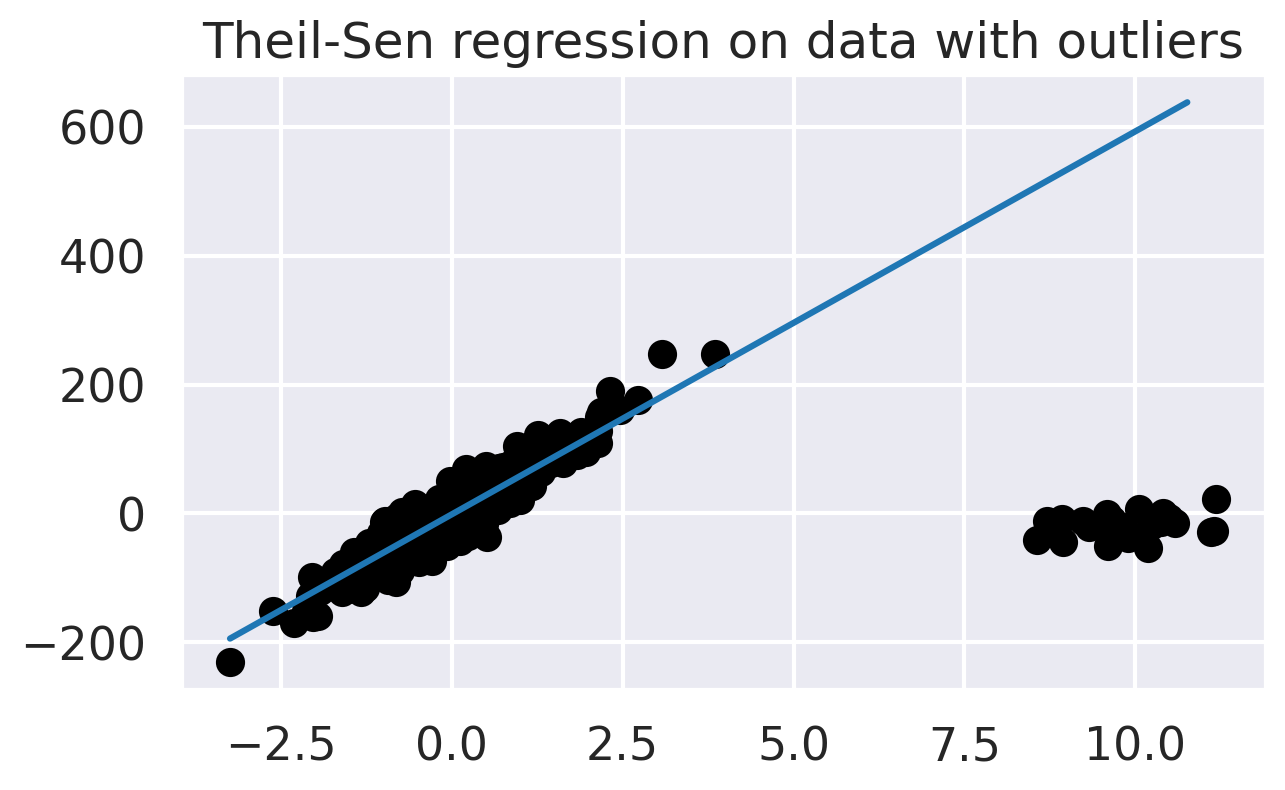

In [14]:
fix, ax = plt.subplots()
fit_df["theilsen_regression"].plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("Theil-Sen regression on data with outliers");

Esses modelos são em geral uma melhor alternativa à simplesmente eliminar (excluir) os outliers. Note que, diferentemente do Theil-Sen e RANSAC, a regressão de Huber não filtra completamente os outliers, mas apenas diminui seu efeito no ajuste.

### Exercício Modelo Robusto

In [25]:
from sklearn.linear_model import (LinearRegression, HuberRegressor,
                                  RANSACRegressor, TheilSenRegressor)

X = df.drop(columns=['preco','banheiros','dormitorios'])
y = df['preco']

model = HuberRegressor(max_iter=1000, fit_intercept=False)
model.fit(X, y)

print("Coeficientes: ", dict(zip(model.feature_names_in_, model.coef_)))
print("Intercept: ", model.intercept_)
print("Score (R2): ", model.score(X, y)) # R2
print()

calculate_metrics(df.preco, model.predict(df.drop(columns=['preco','banheiros','dormitorios'])))
print()

# Predição
y_pred = model.predict(df_case.drop(columns='dormitorios'))
print(f'Preço estimado (scikit-learn): {y_pred[0]:.2f}')

Coeficientes:  {'areaM2': 4492.655163637401, 'suites': 446841.5396600743, 'vagas': -34621.210541821376, 'dormitorios:suites': -93282.98294043326, 'areaM2:vagas': 1947.4920659271363}
Intercept:  0.0
Score (R2):  0.6937843793741134

MSE: 352859852413.90
RMSE: 594020.08
MAPE: 24.34
MAE: 375588.61
sMAPE: 22.55
MAD: 773278.64

Preço estimado (scikit-learn): 1128410.85


# Métricas de Erro
Existem diversas métricas de erro que podem ser úteis para avaliar a performance de um modelo

In [15]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_metrics(y_true, y_pred):
    metrics = {}

    # Mean Squared Error (MSE)
    metrics['MSE'] = mean_squared_error(y_true, y_pred)

    # Root Mean Squared Error (RMSE)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])

    # Mean Absolute Percentage Error (MAPE)
    if np.any(y_true == 0):
        metrics['MAPE'] = 'Undefined (division by zero)'
    else:
        metrics['MAPE'] = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Mean Absolute Error (MAE)
    metrics['MAE'] = mean_absolute_error(y_true, y_pred)

    # Symmetric Mean Absolute Percentage Error (sMAPE)
    metrics['sMAPE'] = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

    # Mean Absolute Deviation (MAD)
    metrics['MAD'] = np.mean(np.abs(y_true - np.mean(y_true)))

    for key, value in metrics.items():
        print(f"{key}: {value:.2f}")

    return metrics

# calculate_metrics(y_true, y_pred)-> acostumar escrever assim


# Regressão Logística: *Classificador Logístico*


> **Importante: A Regressão Logística é um classificador Binário, isto é, ele só classifica categorias Dicotômicas, como *yes/no*, *true/false*!**

O fato de somente classificar categorias Dicotômicas fica claro quando você pensa que saída do modelo é uma única probabilidade $P$, por exemplo a de ser benigno $P(Y=Benigno)$ e que, portanto, podemos apenas obter agora a probabilidade de não ser benigno,  $P(Y \ne Benigno) = 1 - P(Y = Benigno)$. Isso pode parecer uma grande limitação, mas na verdade você sempre pode dividir um problema multiclasse (Edifícios/Pessoas/Paisagens ou Conservador/Moderado/Agressivo) em vários problemas binários (pense, como você faria isso?).

## Modelo logístico


<img src="https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/figuras/linearregressionlogitbreast1.PNG?raw=true" width=1200>

In [ ]:
from sklearn.linear_model import LogisticRegression






Para obtermos essas probabilidades, a regressão logística modela o que é conhecido como log de probabilidades:

$$ log( \frac{p}{1-p}) = a_0 + a_1 x_1 + ... + a_n x_n $$

Os resultados da regressão logística vão então informar sobre as chances ('Odds') e razão das chances ('Odds Ratio') e não exatamente probabilidades (por exemplo, em alguns casos os valores podem não ter soma 1), mas podemos entender de qualquer modo que uma *chance* reflete em uma probabilidade maior daquele evento ocorrer. Se um evento tem probabilidade $p$, suas chances são $p / (1-p)$, e é por isso que a esquerda lado é chamado de "odds logarítmicas" ou "logit", e podemos obter a
probabilidade de chances invertendo a função acima:

$$ p = 1 / (1 + e^{- ( a_0 + a_1 x_1 + ... + a_n x_n ) })$$

Essa função é conhecida como  função logística ou sigmóide, $\sigma$, é definida como:


$$\sigma(x)=\frac{1}{1+e^{-x}}$$


Ela tem o seguinte gráfico:



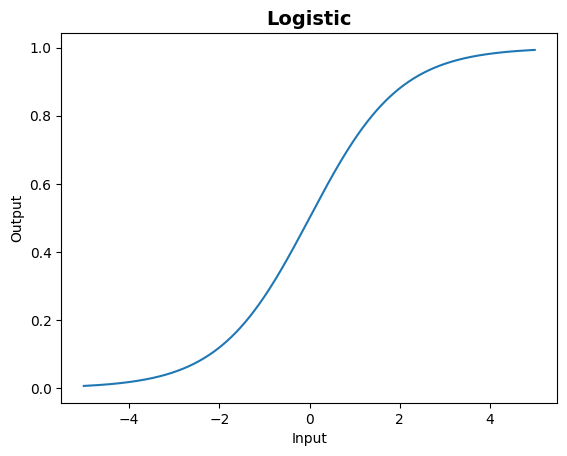

In [ ]:
x = np.arange(-5, 5, 0.01)
y = 1 / (1 + np.exp(-x))

plt.plot(x,y)
plt.title('Logistic', fontsize=14, weight='bold')
plt.xlabel('Input')
plt.ylabel('Output')

plt.show()

### Dilema Viés-Variância



Parece bastante simples construir esses modelos, mas construir bons modelos pode ser uma tarefa bastante difícil.
Vamos nos deter um pouco mais sobre como podemos avaliar os modelos.  

Vamos começar entendo o que é conhecido como **Dilema Viés-Variância** (ou *Bias–variance tradeoff*).

A capacidade de um modelo de capturar a verdadeira relação entre as variáveis preditoras e a variável objetivo é o que chamamos de viés (*bias*). Um alto erro de viés significa que o modelo não se ajusta aos dados e que, portanto, não consegue representar os dados. No limite ele não está aprendendo nada. É o que chamamos de **subajuste do modelo**, ou *underfitting*. Essa, é claro, é uma situação que não queremos.

Entretanto, ao tentarmos reduzir o erro de viés dos dados podemos nos deparar com um outro problema. Com um viés muito pequeno o modelo poder ficar tão ajustado aos dados de treinamento que falha ao tentar prever novos casos que não faziam parte do conjunto de treinamento. Neste caso, o modelo captura toda a variância dos dados. Você pode entender que o modelo passa a ser muito sensível a diferentes conjuntos de treinamento e erra ao *generalizar* novos casos. Isso é o que chamamos de **subreajuste do modelo**, ou *overfitting*.  

O dilema está, portanto, em obter o ponto de equilíbrio entre o subajuste e sobreajuste dos dados.



Automatically created module for IPython interactive environment


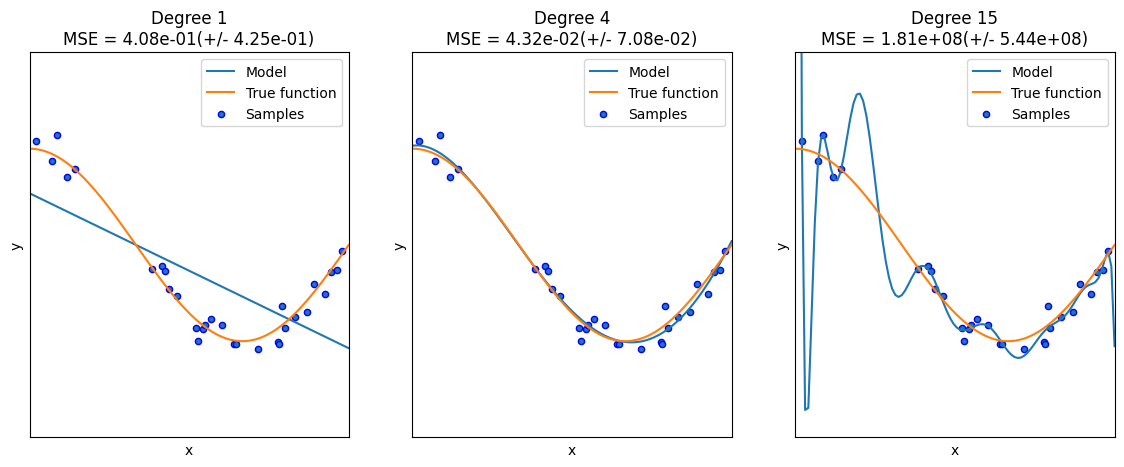

In [ ]:
# fonte: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/SobreESubAjuste.png?raw=true)


<small>
<b>
Figura 7. Exemplos de underfitting e overfitting (Produzido com https://ml-playground.com/#)

### Diminuido o risco de *Overfitting*: Conjuntos de Treinamento e Teste

Aprender ou treinar parâmetros de um modelo de predição e testá-lo com os mesmos dados é um erro de método. É como dar uma prova para avaliar o conhecimento de um aluno somente com exercícios que já foram dados previamente na sala da aula.  Seria um modelo que apenas repete os rótulos das amostras podendo ser perfeito nesses dados, mas sem grande utilidade para predição de novos casos (sobreajuste).

Para evitar o sobreajuste, temos que definir dois conjuntos diferentes de dados a partir dos dados originais, um conjunto de Treinamento e um conjunto de Teste:

* O *conjunto de treinamento* `X_train`, `y_train` será a parte dos dados que empregada para o treinamento dos parâmetros do modelo

* O *conjunto de teste* `X_test`, `y_test` será a parte dos dados que empregada para avaliar o modelo preditivo ajustado

Essa divisão do conjunto original de dados deve ser aleatória (*por que?*) e pode ser obtida com o `scikit-learn` empregando-se a função `train_test_split()`. Seguiremos daqui em diante somente analisando modelos de classificação.

Vamos então aplicar essa abordagem mais correta ao nosso conjunto de dados *Moons*.




![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/TrainTest.png?raw=true)

### Acuracidade: Cuidado e Outras Métricas



Até aqui nossos resultados parecem serem muito bons, com acuracidades acima de 0.8 mesmo quando medida sobre o conjunto de teste.

Mas uma boa acuracidade geral (simplesmente o percentual total de acertos), pode não ser suficiente para produzir bons modelos e pode mesmo, mascarar modelos bastante ruins.

Veja este exemplo, um problema bastante comum de classes desbalanceadas,

| Real/Pred | Maligno | Benigno |
|-|-|-|
| Maligno | 1 | 2 |
| Benigno | 0 | 97 |

A matriz acima é chamada de **matriz de confusão**. Ela apresenta nas linhas os valores reais dos dados e nas colunas as predições. São assim 3 casos reais de casos Malignos, mas apenas 1 foi classificado  corretamente e 2 desses casos foram classificados como benignos. Já os 97 benignos foram todos classificados corretamente. O modelo tem, portanto, acuracidade de 99%!!! ($2+97=$ total de casos classificados corretamente). Entretanto, é fácil ver, o modelo falha miseravelmente ao prever os casos Malignos (acerta apenas 33% desses casos), trazendo um grande risco aos pacientes. É um mal modelo apesar da alta acuracidade geral, e você pode notar que um modelo *trivial* que atribuísse à TODOS os casos a classe 'benigno', já daria uma acuracidade de 97%.

Felizmente, para nós seres humanos, as amostras de tumores malignos é bastante menor que de casos benignos, assim como são bastante menos comuns os casos de fraude ou de e-mails spam, mas classes desbalanceadas como nesses casos representam um grande desafio para o Aprendizado de Máquina.

Esse é o gancho para, na próxima aula, verificarmos outras métricas dos modelos de classificação.


ACURACIDADE ALTA E DADOS DESBALANCEADOS É PESSIMO ASSIM COMO SE A CHUTAMOS SEMPRE CLASSE A EM UM CONJUNTO 50 50 APARECE TER UM ACERTO DE 50%

## Pratica

In [ ]:
from sklearn.linear_model import LogisticRegression


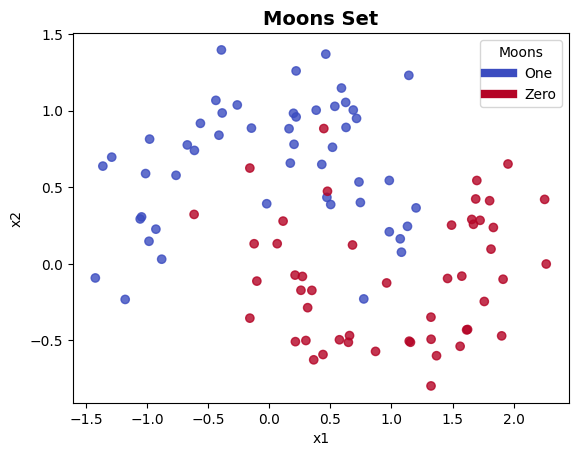

         x1        x2  y
0 -0.763251  0.577354  0
1 -0.391942  1.395641  0
2  1.324561 -0.492319  1
3  0.271295 -0.082532  1
4  2.253887  0.420281  1


In [ ]:
from sklearn.datasets import make_moons
cmap_data = plt.cm.coolwarm

X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)

df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})

plt.scatter(df.x1, df.x2, c=df.y, cmap=cmap_data, alpha=0.8)
plt.title('Moons Set',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Moons')

plt.show()

print(df.head())

In [ ]:

# Definir entradas e saidas do modelo

X = df[['x1','x2']]
y = df.y

#Criar modelo
# clf = LogisticRegression()

clf = LogisticRegression(max_iter=1000)
print(clf)

# Treinar modelo
clf.fit(X,y)
print( clf.coef_, clf.intercept_)

# Prever baseado no modelo

y_pred = clf.predict(X)
print(y_pred) 



# Predição para um caso especifico
X_new = pd.DataFrame({'x1': [ -0.763251  ], 'x2': [0.577354]})
y_pred_case = clf.predict(X_new)

# print(5*'\n' + 'x = ' , X_new, '\npredição = ', y_pred_case)
print('x = ' , X_new, '\npredição = ', y_pred_case)




# Acuracidade
print(sum(y_pred == y) / len(y))

print(y_pred_case)

LogisticRegression(max_iter=1000)
[[ 1.21523438 -2.60803724]] [0.12484869]
[0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1
 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0]
x =           x1        x2
0 -0.763251  0.577354 
predição =  [0]
0.87
[0]


In [ ]:
print(clf.coef_, clf.intercept_)

[[ 1.21523438 -2.60803724]] [0.12484869]


In [ ]:
clf.classes_

array([0, 1])

Ainda existem outros preditores úteis que retornam a probabilidade ou o log da probabilidade de cada classe, o que é  útil quando se deseja refinar os resultados ou ainda desejamos empregar esses valores para solução de problemas multiclasse.

In [ ]:
clf.predict_proba(X)[0:10]

array([[0.90957378, 0.09042622],
       [0.98186015, 0.01813985],
       [0.04659762, 0.95340238],
       [0.33854573, 0.66145427],
       [0.14582354, 0.85417646],
       [0.14251362, 0.85748638],
       [0.03145696, 0.96854304],
       [0.91387591, 0.08612409],
       [0.96036923, 0.03963077],
       [0.87472292, 0.12527708]])

In [ ]:
clf.predict_proba(X)[1][0] + clf.predict_proba(X)[1][1]

1.0

In [ ]:
clf.predict_log_proba(X)[0:10]

array([[-0.09477916, -2.40322103],
       [-0.01830639, -4.00964435],
       [-3.06620578, -0.04771824],
       [-1.08309611, -0.41331442],
       [-1.925358  , -0.15761748],
       [-1.94831768, -0.15374999],
       [-3.45913493, -0.03196236],
       [-0.09006048, -2.45196614],
       [-0.04043746, -3.22814934],
       [-0.13384811, -2.07722732]])

In [ ]:
#Erros
sum(y != y_pred)

13

## Metricas de Avaliação do Modelo

### Acuracidade

medida de eficiência do modelo => equivalente ao R-Square da regressão linear

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_pred)
print('\nScore de Acuracidade (modo 1):\n')
print(accuracy)

accuracy = clf.score(X, y)
print('\nScore de Acuracidade (modo 2):\n')
print(accuracy)


Score de Acuracidade (modo 1):

0.87

Score de Acuracidade (modo 2):

0.87


In [ ]:
clf.score(X,y)  #percentual de acerto do nosso modelo quando comparamos com os rótulos (as respostas) presentes no nosso conjunto.

0.87

In [ ]:
sum( clf.predict(X) == y ) / len(X)

0.87

In [ ]:
df['y_pred'] = clf.predict(X)
df['prediction'] = df['y_pred'] == df['y']
df


,x1,x2,y,y_pred,prediction
0,-0.763251,0.577354,0,0,True
1,-0.391942,1.395641,0,0,True
2,1.324561,-0.492319,1,1,True
3,0.271295,-0.082532,1,1,True
4,2.253887,0.420281,1,1,True
...,...,...,...,...,...
95,1.491966,0.252394,1,1,True
96,-0.159110,0.624741,1,0,False
97,-1.289734,0.695981,0,0,True
98,1.575789,-0.080554,1,1,True


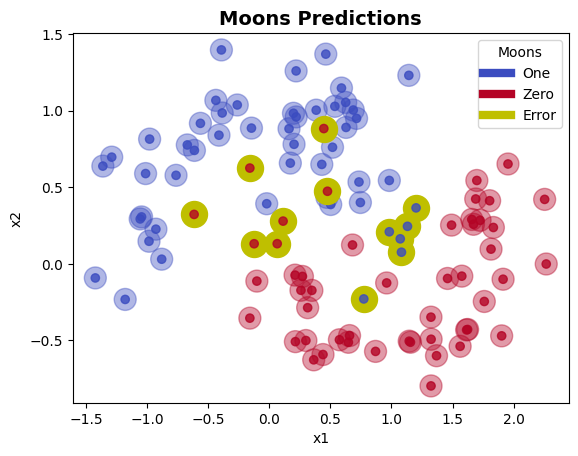

In [ ]:
cmap_data = plt.cm.coolwarm

y_pred = clf.predict(X)

plt.scatter(X.x1, X.x2, c=y, cmap=cmap_data, alpha=0.8)
plt.scatter(X.x1, X.x2, c=y_pred, s=250,cmap=cmap_data, alpha=0.4)

plt.scatter(X[y_pred != y].x1, X[y_pred != y].x2, color='y', s=350, alpha=1, label='wrong predictions')
plt.scatter(X[y_pred != y].x1, X[y_pred != y].x2, c=y[y_pred != y], cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6),
                Line2D([0], [0], color='y', lw=6)]
plt.legend(custom_lines, ['One', 'Zero', 'Error'], loc='upper right',title='Moons')

plt.show()



E podemos ainda verificar a *fronteira de decisão* do estimador.

/home/anamarcacini/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


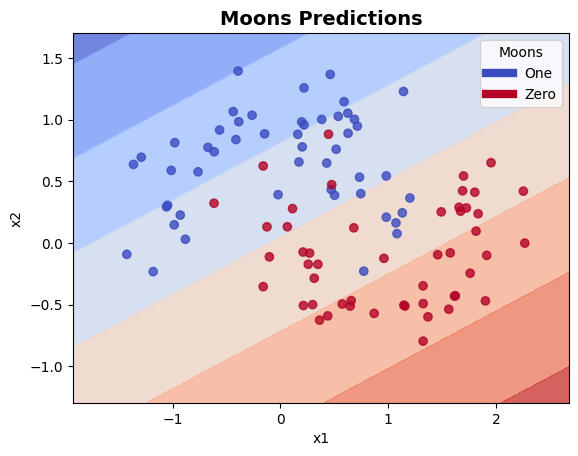

In [ ]:
x_min, x_max = X['x1'].min() - .5, X['x1'].max() + .5
y_min, y_max = X['x2'].min() - .5, X['x2'].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

if hasattr(clf, "decision_function"):
  Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
  Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_data, alpha=0.8)
plt.scatter(X['x1'], X['x2'], c=y, cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]

plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Moons')

plt.show()

#### Problema da Acuracia

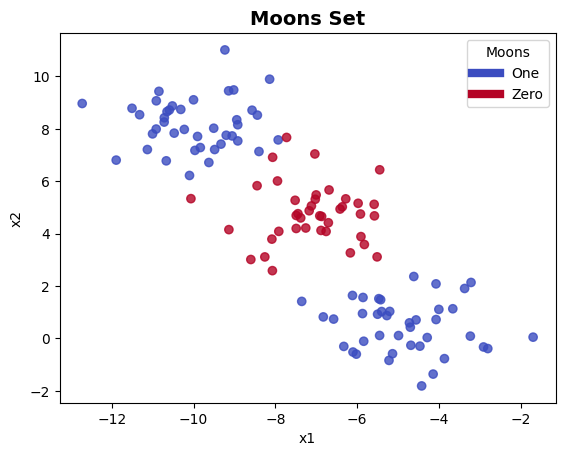

         x1        x2  y
0 -5.422578  1.477418  0
1 -5.270181  0.872708  0
2 -2.800484 -0.387307  0
3 -8.064956  6.915338  1
4 -6.111296  1.640534  0


In [ ]:
from sklearn.datasets import make_moons, make_blobs
cmap_data = plt.cm.coolwarm

X, y = make_blobs(n_samples=120, n_features=2, random_state=12)
df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})
df.y = df.y.replace(1,2)
df.y = df.y.replace(0,1)
df.y = df.y.replace(2,0)

plt.scatter(df.x1, df.x2, c=df.y, cmap=cmap_data, alpha=0.8)
plt.title('Moons Set',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Moons')

plt.show()

print(df.head())

In [ ]:
df.y.value_counts()

0    80
1    40
Name: y, dtype: int64

In [ ]:
#### TENTANDO COM O CLASSIFICADOR LOGÍSTICO

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['x1','x2']]
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=1000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( f'{clf.score(X_test,y_test):.2f}' )


[1 0 0 0 0 0 0 0 0 0] ...
0.69


In [ ]:
sum(y_test != y_pred)

11

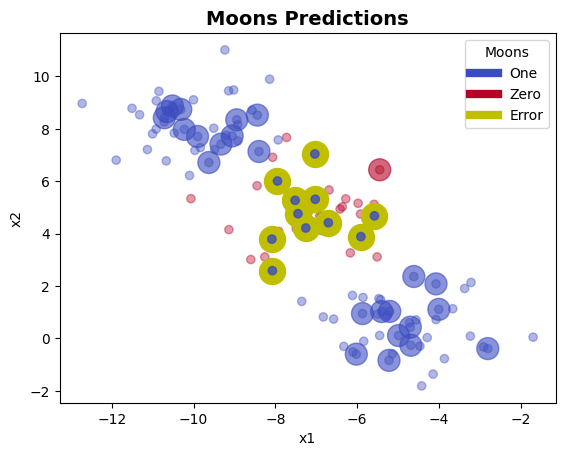

In [ ]:
cmap_data = plt.cm.coolwarm

plt.scatter(X.x1, X.x2, c=y, cmap=cmap_data, alpha=0.4) # todos dados
plt.scatter(X_test.x1, X_test.x2, c=y_pred, s=250,cmap=cmap_data, alpha=0.6) # somente dados de teste

plt.scatter(X_test[y_pred != y_test].x1, X_test[y_pred != y_test].x2, color='y', s=350, alpha=1, label='wrong predictions')
plt.scatter(X_test[y_pred != y_test].x1, X_test[y_pred != y_test].x2, c=y_test[y_pred != y_test], cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6),
                Line2D([0], [0], color='y', lw=6)]
plt.legend(custom_lines, ['One', 'Zero', 'Error'], loc='upper right',title='Moons')

plt.show()



## Exemplo Pratico

### tratamento de dados

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/TarekDib03/Analytics/master/Week3%20-%20Logistic%20Regression/Data/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
print('Before',len(df))
df = df.dropna()
print('After',len(df))

Before 4240
After 3658


### Criação treinamento e previsão do modelo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TenYearCHD'])
y = df.TenYearCHD

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=10000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( f'{clf.score(X_test,y_test):.2f}' )

[0 0 1 0 0 0 0 0 0 0] ...
0.85


### Metricas do Modelo

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.2f}')

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Matriz de Confusão:

[[920  11]
 [153  14]]

Score de Acuracidade (1):

0.85

Score de Acuracidade (2):

0.85

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       931
           1       0.56      0.08      0.15       167

    accuracy                           0.85      1098
   macro avg       0.71      0.54      0.53      1098
weighted avg       0.81      0.85      0.80      1098




Como você pode ver, apesar da acuracidade de $0.85$ do nosso modelo, ele acerta apenas pouco mais que uma moeda ($0.5$ é são as chances de cara ou coroa),  $0.56$, dos casos positivos de doença. Além disso apenas 0.08 dos casos de doença foram identificados pelo modelo. Esses dois valores se refletem também baixo F1-score médio desse modelo. Este é, portanto, um péssimo modelo se o objetivo é identificar pacientes em risco!

In [ ]:
clf.classes_

array([0, 1])

## Cuidado com a Regressão Lógistica

         x1        x2  y
0  0.401331  0.885831  0
1 -0.234227 -0.844913  1
2  0.678022  0.334662  1
3  0.969801 -0.232501  0
4  0.100768 -0.821603  1


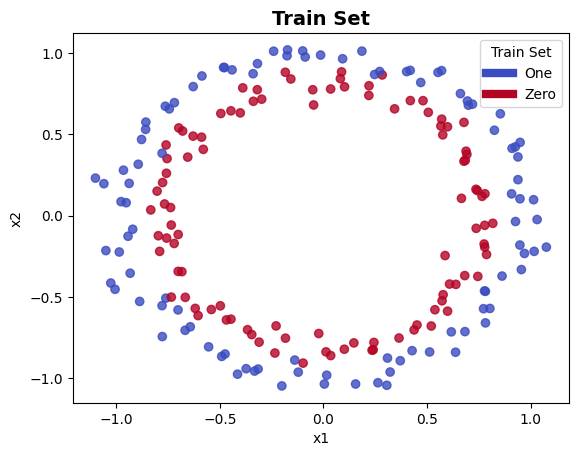

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200, factor=0.8, noise=0.05, random_state=0)
df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})
print(df.head())

plt.scatter(df.x1, df.x2, c=df.y, cmap=cmap_data, alpha=0.8)
plt.title('Train Set',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Train Set')

plt.show()



In [ ]:
from sklearn.linear_model import LogisticRegression

# Definição
clf = LogisticRegression()

# Treinamento
clf.fit(X,y)

# Avaliação
y_pred = clf.predict(X)

# Acuracidade
print(sum(y_pred == y) / len(y))

0.495


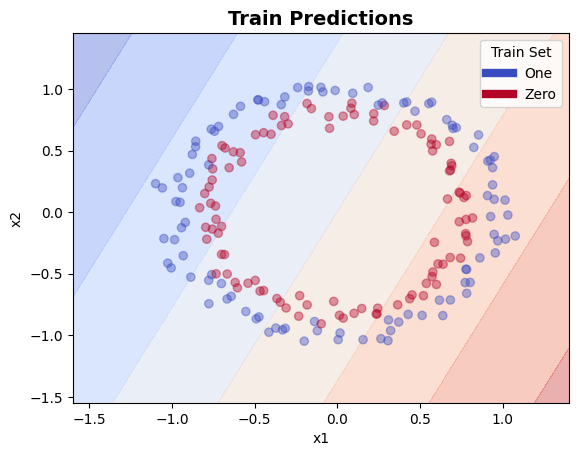

In [ ]:
X = df
x_min, x_max = X['x1'].min() - .5, X['x1'].max() + .5
y_min, y_max = X['x2'].min() - .5, X['x2'].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

if hasattr(clf, "decision_function"):
  Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
  Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_data, alpha=0.4)
plt.scatter(X['x1'], X['x2'], c=y, cmap=cmap_data, alpha=0.4)
plt.title('Train Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]

plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Train Set')

plt.show()

# K-Vizinhos Mais Próximos


## Teoria


O K-Vizinhos mais Próximos, ou Knn (do inglês, K nearest neighbors) é um dos modelos mais simples de classificação, mas também bastante empregado. Seu funcionamento se baseia em um princípio muito simples que nós mesmos adotamos frequentemente no dia a dia, nós, por exemplo, nos assemelhamos às pessoas mais próximas de nós. Assim, é razoável supor que podemos classificar uma instância de acordo com a classe de seus vizinhos mais próximos.

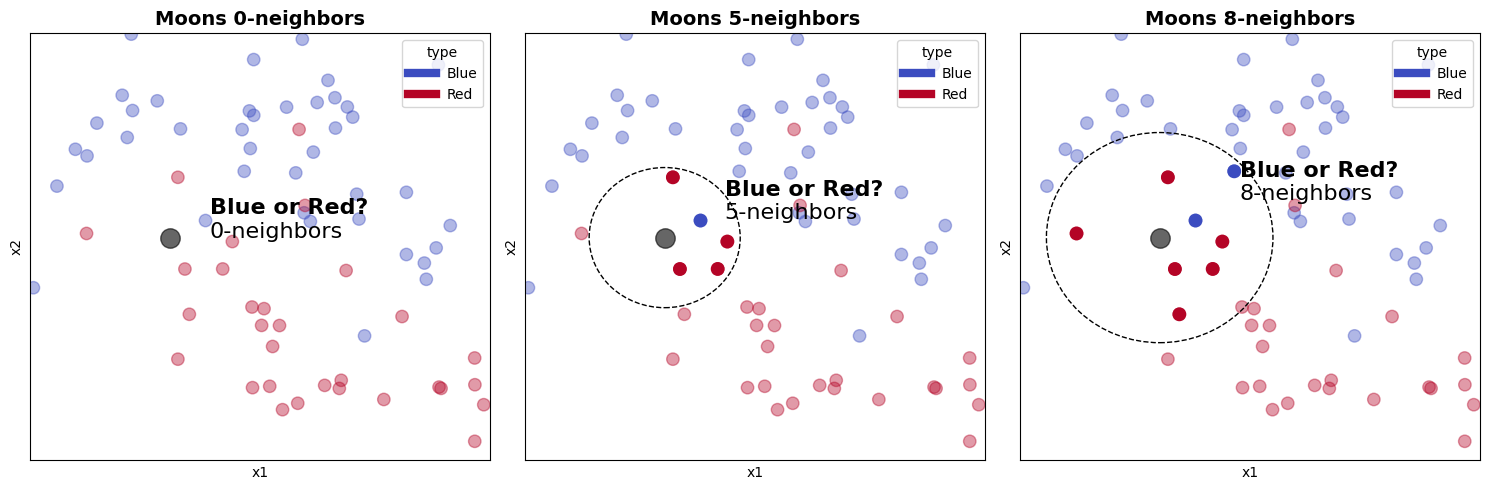

In [ ]:
# you can skip this code!

from sklearn.datasets import make_moons
from sklearn.metrics import DistanceMetric
cmap_data = plt.cm.coolwarm

X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)
moons = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})

X, y = make_moons(n_samples=1, noise=0.25, random_state=123)
# amoon = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})
amoon = pd.DataFrame({'x1':[-.2], 'x2':[.3]})

dist = DistanceMetric.get_metric('euclidean')
moons['distance'] = dist.pairwise(moons[['x1','x2']],amoon[['x1','x2']])

f, ax = plt.subplots(1,3,figsize=(15,5))
cmap_data = plt.cm.coolwarm

for i in range(3):
  neighbors = moons.nsmallest([0,5,8][i],'distance')
  ax[i].scatter(moons.x1, moons.x2, c=moons.y, cmap=cmap_data, alpha=0.4, s=80)
  ax[i].scatter(neighbors.x1, neighbors.x2, c=neighbors.y, cmap=cmap_data, s=80)
  ax[i].plot(amoon.x1, amoon.x2, 'ko', markersize=14, alpha=0.6)

  a_circle = plt.Circle((amoon.x1, amoon.x2), neighbors.distance.max()+0.05, edgecolor='k', linestyle='dashed',fill=False)
  ax[i].add_artist(a_circle)

  ax[i].text(amoon.x1+0.2+i/10, amoon.x2+i/10,'Blue or Red?\n', weight='bold', fontsize=16)
  ax[i].text(amoon.x1+0.2+i/10, amoon.x2+i/10,' \n' + str([0,5,8][i]) + '-neighbors', fontsize=16)
  ax[i].set_title('Moons ' + str([0,5,8][i]) + '-neighbors',weight='bold',fontsize=14)
  ax[i].set_xlabel("x1")
  ax[i].set_ylabel("x2")

  custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                  Line2D([0], [0], color=cmap_data(1.), lw=6)]
  ax[i].legend(custom_lines, ['Blue', 'Red'], loc='upper right',title='type')

  ax[i].set_xlim([-0.9,1.4])
  ax[i].set_ylim([-0.9,1.4])
  ax[i].set_xticks([])
  ax[i].set_yticks([])
  # ax[i].axis('equal')

plt.tight_layout()
plt.show()


O número k define quantos vizinhos queremos empregar na classificação. No exemplo acima, considerando 5 vizinhos, você pode verificar que há uma chance de $4/5$ de que a moon *cinza* seja uma moon *red*, e com 8 vizinhos a chance é de $6/8 = 3/4$ de ser *red*. Assim, assumimos nos dois casos a classe *red* para prever a classe do ponto selecionado.

In [ ]:
loans = pd.DataFrame({'age':[25,35,45,20,35,52,23,40,60,48,33],
                      'loan':[40000,60000,80000,20000,120000,18000,95000,62000,100000,220000,150000],
                      'default':[1,1,1,1,1,1,0,0,0,0,0] }) # 1='yes'

case  = pd.DataFrame({'age':[47],'loan':[142000]})

display(loans)
display(case)

,age,loan,default
0,25,40000,1
1,35,60000,1
2,45,80000,1
3,20,20000,1
4,35,120000,1
5,52,18000,1
6,23,95000,0
7,40,62000,0
8,60,100000,0
9,48,220000,0


,age,loan
0,47,142000


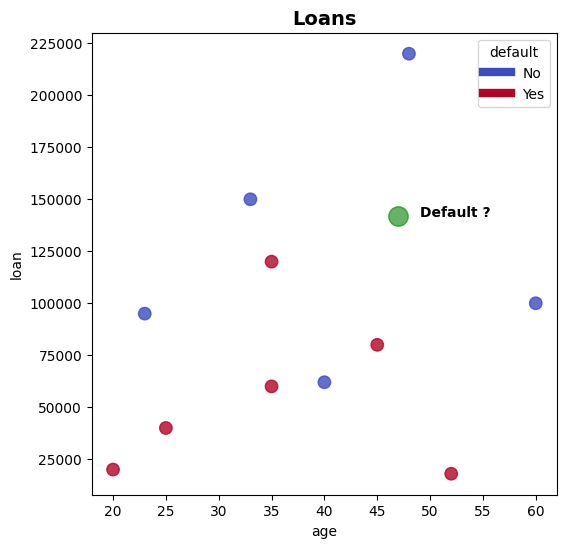

In [ ]:
f, ax = plt.subplots(1,1,figsize=(6,6))
cmap_data = plt.cm.coolwarm

ax.scatter(loans.age, loans.loan, c=loans.default, cmap=cmap_data, alpha=0.8, s=80)
ax.plot(case.age, case.loan, 'go', markersize=14, alpha=0.6)

plt.text(case.age+2, case.loan,'Default ?', weight='bold')
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("age")
plt.ylabel("loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['No', 'Yes'], loc='upper right',title='default')

plt.show()


In [ ]:
from sklearn.metrics import DistanceMetric

dist = DistanceMetric.get_metric('euclidean')
d = dist.pairwise(loans[['age','loan']],case[['age','loan']])

loans['distance'] = d
display(loans.sort_values('distance'))

,age,loan,default,distance
10,33,150000,0,8000.012250
4,35,120000,1,22000.003273
8,60,100000,0,42000.002012
6,23,95000,0,47000.006128
2,45,80000,1,62000.000032
9,48,220000,0,78000.000006
7,40,62000,0,80000.000306
1,35,60000,1,82000.000878
0,25,40000,1,102000.002373
3,20,20000,1,122000.002988


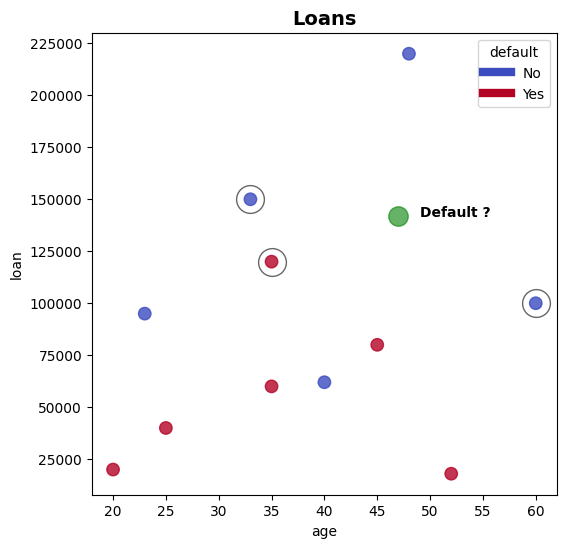

,age,loan,default,distance
10,33,150000,0,8000.012250
4,35,120000,1,22000.003273
8,60,100000,0,42000.002012


In [ ]:
k3_neighbors = loans.nsmallest(3,'distance')

f, ax = plt.subplots(1,1,figsize=(6,6))
cmap_data = plt.cm.coolwarm

ax.scatter(k3_neighbors.age, k3_neighbors.loan, edgecolors='k', c='w', alpha=0.6, s=400)
ax.scatter(loans.age, loans.loan, c=loans.default, cmap=cmap_data, alpha=0.8, s=80)
ax.plot(case.age, case.loan, 'go', markersize=14, alpha=0.6)

plt.text(case.age+2, case.loan,'Default ?', weight='bold')
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("age")
plt.ylabel("loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['No', 'Yes'], loc='upper right',title='default')

plt.show()

display(k3_neighbors)

## IMPORTANTE NORMALIZAR OS DADOS --> o atributo loans tem maior peso que o age assim a distancia de loans é mais valida que a de age

In [ ]:
dist = DistanceMetric.get_metric('euclidean') # distancia euclidiana
d = dist.pairwise(loans[['loan']],case[['loan']])

loans['distance_loans'] = d
display(loans.sort_values('distance'))

,age,loan,default,distance,distance_loans
10,33,150000,0,8000.012250,8000.0
4,35,120000,1,22000.003273,22000.0
8,60,100000,0,42000.002012,42000.0
6,23,95000,0,47000.006128,47000.0
2,45,80000,1,62000.000032,62000.0
9,48,220000,0,78000.000006,78000.0
7,40,62000,0,80000.000306,80000.0
1,35,60000,1,82000.000878,82000.0
0,25,40000,1,102000.002373,102000.0
3,20,20000,1,122000.002988,122000.0


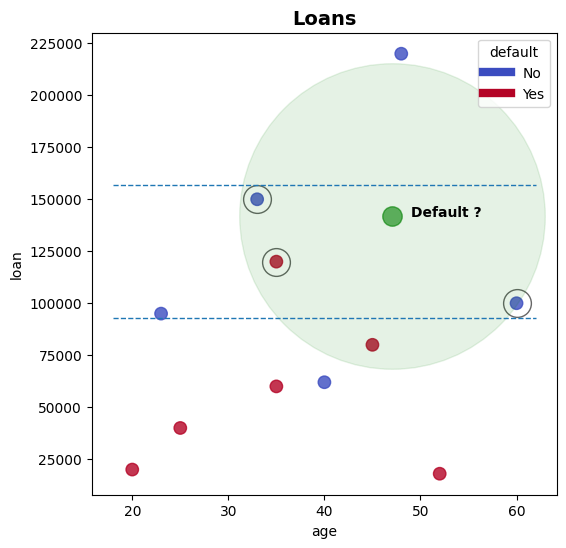

,age,loan,default,distance
10,33,150000,0,8000.012250
4,35,120000,1,22000.003273
8,60,100000,0,42000.002012


In [ ]:
f, ax = plt.subplots(1,1,figsize=(6,6))
cmap_data = plt.cm.coolwarm

ax.plot(case.age, case.loan, 'go', markersize=220, alpha=0.10)
ax.scatter(k3_neighbors.age, k3_neighbors.loan, edgecolors='k', c='w', alpha=0.6, s=400)
ax.scatter(loans.age, loans.loan, c=loans.default, cmap=cmap_data, alpha=0.8, s=80)
ax.plot(case.age, case.loan, 'go', markersize=14, alpha=0.6)

plt.hlines(157000,18,62,linestyles='dashed',lw=1)
plt.hlines(93000,18,62,linestyles='dashed',lw=1)

plt.text(case.age+2, case.loan,'Default ?', weight='bold')
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("age")
plt.ylabel("loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['No', 'Yes'], loc='upper right',title='default')

plt.show()

display(k3_neighbors)

## Prática

In [ ]:
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler

X = loans[['age','loan']]
y = loans.default

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
case_scaled = scaler.transform(case)

clf = neighbors.KNeighborsClassifier(n_neighbors = 3)

clf.fit(X, y)

y_pred = clf.predict(case_scaled)

default_pred = ['No','Yes'][y_pred[0]]
print('Default? ', default_pred)

Default?  Yes


In [ ]:
clf.score(X,y) # Acuracia

0.7272727272727273

#### Importando DF

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/TarekDib03/Analytics/master/Week3%20-%20Logistic%20Regression/Data/framingham.csv')
df.head(1)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0


#### Tratando os dados

In [ ]:
print('Before',len(df))
df = df.dropna()
print('After',len(df))

Before 4240
After 3658


### Normalização dos dados + Separação dos dados em treino e teste + Criação do modelo + treinamento e predição

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TenYearCHD'])
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
y = df.TenYearCHD

X_train, X_test, y_train, y_test = \
train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = KNeighborsClassifier(n_neighbors = 3)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( f'{clf.score(X_test,y_test):.2f}' )

[0 0 1 0 0 0 0 0 1 0] ...
0.82


### Métricas

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.2f}')

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Matriz de Confusão:

[[865  66]
 [136  31]]

Score de Acuracidade (1):

0.82

Score de Acuracidade (2):

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       931
           1       0.32      0.19      0.23       167

    accuracy                           0.82      1098
   macro avg       0.59      0.56      0.57      1098
weighted avg       0.78      0.82      0.79      1098



### Previsões

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
case = pd.DataFrame( df.drop(columns=['TenYearCHD']).iloc[0]).transpose()
print(f"Resposta : {df['TenYearCHD'].iloc[0]}")
case

Resposta : 0


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0


In [ ]:
# Normalizar

case = scaler.transform(case)
case

array([[1.        , 0.18421053, 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16837782,
        0.10638298, 0.23280423, 0.27702375, 0.36363636, 0.10451977]])

In [ ]:
clf.predict(case)

array([0])

#### Quantile

Se considerarmos 0.82 um bom resultado, esse é um bom modelo e podemos então aplicá-lo  para novos casos do mesmo modo que fizemos antes com o classificador logístico (aula anterior). Por exemplo, podemos fazer predição para pacientes homens e mulheres hipotéticos em que todos os indicadores estejam no percentil 0.75.

> **Você deve notar agora que, como fizemos uma transformação dos dados das variáveis preditoras precisamos aplicar esta mesma transformação (a normalização!) nos valores dos novos casos. Como empregamos um estimador `scaler`, podemos empregar essa mesma transformação e você pode notar também que, se não tivéssemos empregado um estimador, não saberíamos como aplicar a mesma transformação! Essa a vantagem de empregarmos um estimador para isso!**

In [ ]:
df.drop(columns=['TenYearCHD']).groupby('male').quantile(0.75)

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,,,,,,,,,,,,,,
0,56.0,3.0,1.0,10.0,0.0,0.0,1.0,0.0,268.0,146.0,89.0,27.71,85.0,86.0
1,56.0,3.0,1.0,20.0,0.0,0.0,1.0,0.0,259.0,141.0,90.0,28.30,80.0,87.0


In [ ]:
X_new = pd.DataFrame( df.drop(columns=['TenYearCHD']).groupby('male').quantile(0.75) ).reset_index()

X_new = scaler.transform(X_new)
X_new


array([[0.        , 0.63157895, 0.66666667, 1.        , 0.14285714,
        0.        , 0.        , 1.        , 0.        , 0.31827515,
        0.29550827, 0.43386243, 0.2949588 , 0.41414141, 0.1299435 ],
       [1.        , 0.63157895, 0.66666667, 1.        , 0.28571429,
        0.        , 0.        , 1.        , 0.        , 0.29979466,
        0.27186761, 0.44444444, 0.30925836, 0.36363636, 0.13276836]])

In [ ]:
clf.predict(X_new)

array([0, 0])

Como no modelo logístico esses pacientes não apresentam risco segundo nosso modelo e você pode verificar outros percentis, como o percentil 0.9 em que já estimamos o risco para pacientes do sexo masculino.

In [ ]:
X_new = pd.DataFrame( df.drop(columns=['TenYearCHD']).groupby('male').quantile(0.90) ).reset_index()

X_new = scaler.transform(X_new)
clf.predict(X_new)

array([0, 1])

### Previsão para o percentil

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

X = df.drop(columns=['ID','class'])
y = df['class']

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = KNeighborsClassifier(n_neighbors = 9)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( clf.score(X_test,y_test) )

['benign' 'benign' 'malignant' 'benign' 'benign' 'malignant' 'benign'
 'benign' 'benign' 'benign'] ...
0.9380952380952381


In [ ]:
# Se considerarmos 0.93 um bom resultado podemos então aplicar o modelo para novos casos. Por exemplo, podemos fazer predição considerando pacientes hipotéticos valores das medidas v1-v9 dos tumores nos percentis  [0.10,0.25,0.75,0.90] 

X_new = pd.DataFrame( df.drop(columns=['ID','class']).quantile([0.10, 0.25, 0.75, 0.90]) ).reset_index(drop=True)
display(X_new)
X_new_scaled = scaler.transform(X_new)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
1,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
2,6.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,1.0
3,9.0,9.0,8.0,8.0,6.0,10.0,7.0,9.0,3.0


In [ ]:
clf.predict(X_new_scaled)

array(['benign', 'benign', 'malignant', 'malignant'], dtype=object)

# Regressão Logística
Não devemos confundir modelos de regressão em geral, lineares ou não, que preveem valores com a Regressão Logística que é um modelo de **Classificação**.

A Regressão Logística  modela as probabilidades para problemas de classificação binários, com dois resultados possíveis, como *yes/no*, *true/false*, *fraude/não fraude*, *spam/não spam* ou *0/1*, e pode ser entendido como uma extensão dos modelos de regressão linear para problemas de classificação.

> **Importante: A Regressão Logística é um classificador Binário, isto é, ele só classifica categorias Dicotômicas, como *yes/no*, *true/false*!**

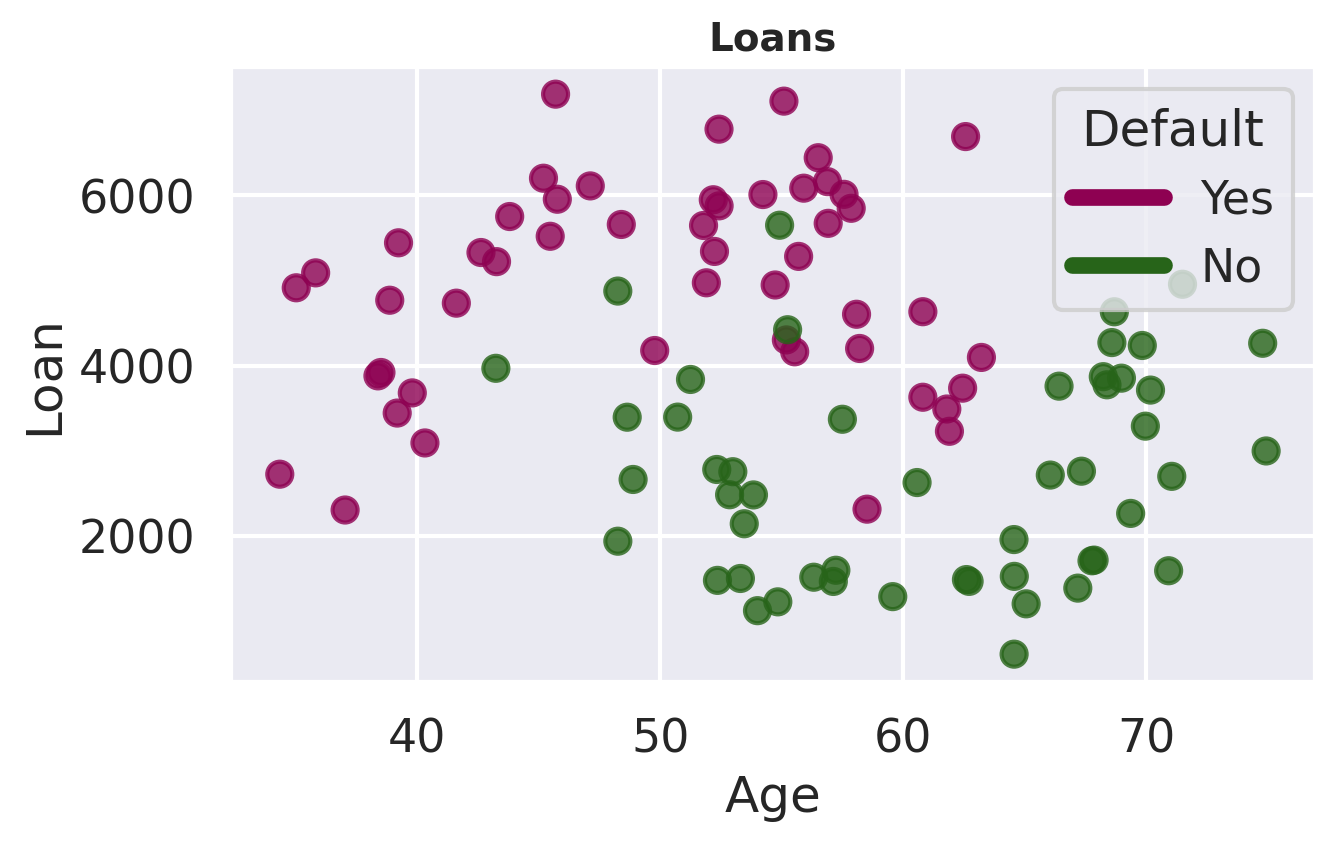

         age         loan  default
0  41.604235  4732.639984        0
1  45.688635  7188.319998        0
2  64.570169  1522.549822        1
3  52.984240  2752.321406        1
4  74.792752  4261.263330        1


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.datasets import make_moons
cmap_data = plt.cm.PiYG

X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)

df_loans = pd.DataFrame({'age':X[:, 0], 'loan':X[:, 1], 'default':y})

df_loans.age = df_loans.age + 50 + df_loans.age*10
df_loans.loan = df_loans.loan + 3000 + df_loans.loan*3000

plt.scatter(df_loans.age, df_loans.loan, c=df_loans.default, cmap=cmap_data, alpha=0.8)
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("Age")
plt.ylabel("Loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['Yes', 'No'], loc='upper right',title='Default')

plt.show()

print(df_loans.head())

In [39]:
from sklearn.linear_model import LogisticRegression

# Definição das entradas e saídas do modelo
X = df[['x1','x2']]
y = df.y

# Classe do modelo e seus parâmetros
clf = LogisticRegression(max_iter=1000)

# Treinamento do modelo
clf.fit(X,y)

print( clf.coef_, clf.intercept_)

[[ 1.21523438 -2.60803724]] [0.12484869]


> Os valores coef_ e clf.intercept_ são os parâmetros estimados para regressão logística e irão variar de modelo para modelo.

In [40]:
clf.predict(X)

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [42]:
# Probabilidade de ser cada classe
clf.predict_proba(X)[0:10]

array([[0.90957378, 0.09042622],
       [0.98186015, 0.01813985],
       [0.04659762, 0.95340238],
       [0.33854573, 0.66145427],
       [0.14582354, 0.85417646],
       [0.14251362, 0.85748638],
       [0.03145696, 0.96854304],
       [0.91387591, 0.08612409],
       [0.96036923, 0.03963077],
       [0.87472292, 0.12527708]])

In [44]:
# Eficiência do modelo
clf.score(X,y)
sum( clf.predict(X) == y ) / len(X)

0.87

> O score corresponde à **Acuracidade do Modelo** sobre o nosso conjunto de treinamento `X`, isto é, o percentual de acerto do nosso modelo quando comparamos com os rótulos (as respostas) presentes no nosso conjunto. Você é possível obter o mesmo valor apenas contando o número de acertos da predição sobre o total de casos.

In [46]:
# Tabela de Acertos
df['y_pred'] = clf.predict(X)
df['prediction'] = df['y_pred'] == df['y']
df

,x1,x2,y,y_pred,prediction
0,-0.763251,0.577354,0,0,True
1,-0.391942,1.395641,0,0,True
2,1.324561,-0.492319,1,1,True
3,0.271295,-0.082532,1,1,True
4,2.253887,0.420281,1,1,True
...,...,...,...,...,...
95,1.491966,0.252394,1,1,True
96,-0.159110,0.624741,1,0,False
97,-1.289734,0.695981,0,0,True
98,1.575789,-0.080554,1,1,True


## Dilema Viés-Variância

Parece bastante simples construir esses modelos, mas construir bons modelos pode ser uma tarefa bastante difícil.
Vamos nos deter um pouco mais sobre como podemos avaliar os modelos.  

Vamos começar entendo o que é conhecido como **Dilema Viés-Variância** (ou *Bias–variance tradeoff*).

A capacidade de um modelo de capturar a verdadeira relação entre as variáveis preditoras e a variável objetivo é o que chamamos de viés (*bias*). Um alto erro de viés significa que o modelo não se ajusta aos dados e que, portanto, não consegue representar os dados. No limite ele não está aprendendo nada. É o que chamamos de **subajuste do modelo**, ou *underfitting*. Essa, é claro, é uma situação que não queremos.

Entretanto, ao tentarmos reduzir o erro de viés dos dados podemos nos deparar com um outro problema. Com um viés muito pequeno o modelo poder ficar tão ajustado aos dados de treinamento que falha ao tentar prever novos casos que não faziam parte do conjunto de treinamento. Neste caso, o modelo captura toda a variância dos dados. Você pode entender que o modelo passa a ser muito sensível a diferentes conjuntos de treinamento e erra ao *generalizar* novos casos. Isso é o que chamamos de **subreajuste do modelo**, ou *overfitting*.  

O dilema está, portanto, em obter o ponto de equilíbrio entre o subajuste e sobreajuste dos dados.


## Diminuido o risco de *Overfitting*: Conjuntos de Treinamento e Teste

Aprender ou treinar parâmetros de um modelo de predição e testá-lo com os mesmos dados é um erro de método. É como dar uma prova para avaliar o conhecimento de um aluno somente com exercícios que já foram dados previamente na sala da aula.  Seria um modelo que apenas repete os rótulos das amostras podendo ser perfeito nesses dados, mas sem grande utilidade para predição de novos casos (sobreajuste).

Para evitar o sobreajuste, temos que definir dois conjuntos diferentes de dados a partir dos dados originais, um conjunto de Treinamento e um conjunto de Teste:

* O *conjunto de treinamento* `X_train`, `y_train` será a parte dos dados que empregada para o treinamento dos parâmetros do modelo

* O *conjunto de teste* `X_test`, `y_test` será a parte dos dados que empregada para avaliar o modelo preditivo ajustado

Essa divisão do conjunto original de dados deve ser aleatória (*por que?*) e pode ser obtida com o `scikit-learn` empregando-se a função `train_test_split()`. Seguiremos daqui em diante somente analisando modelos de classificação.

In [47]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)
df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['x1','x2']]
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=1000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( clf.score(X_test,y_test) )

[0 1 0 0 0 0 1 1 0 1] ...
0.9333333333333333


> O parâmetro `stratify=y` indica que os conjuntos de treinamento e teste manterão a mesma proporção dos valores do atributo objetivo `y`. Os parâmetros `test_size=0.3` indica o percentual (30%) dos dados que será empregado para teste. Esse valor varia, em geral, de 20-30% dos dados. Por fim, o parâmetro `random_state=123` é para a reprodutibilidade dos resultados.

In [49]:
# Número de erros no teste
sum(y_test != y_pred)

2

# Metricas De Problemas de Classificação

## Matriz de Confusão

In [ ]:
import pandas as pd

# Criando os dados da matriz de confusão com as siglas
data = [
    ['TP', 'FN'],  
    ['FP', 'TN']   
]

# Criando um DataFrame com dois níveis de cabeçalhos
df_confusion = pd.DataFrame(data, 
                            columns=pd.MultiIndex.from_tuples(
                                [('Valor Previsto', 'Positivo'), ('Valor Previsto', 'Negativo')]
                            ),
                            index=pd.MultiIndex.from_tuples(
                                [('Valor Real', 'Positivo'), ('Valor Real', 'Negativo')]
                            ))

# df_confusion

# Função para aplicar cores conforme o tipo de previsão
def color_confusion(val):
    if val == 'TP':
        color = 'green'
    elif val == 'FP':
        color = 'red'
    elif val == 'FN':
        color = 'gray'
    elif val == 'TN':
        color = 'blue'
    else:
        color = 'white'
    return f'background-color: {color}'
# Aplicando o estilo com as cores
styled_df = df_confusion.style.applymap(color_confusion)

# Exibindo o DataFrame estilizado
styled_df


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.2f}')

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Matriz de Confusão:

[[865  66]
 [136  31]]

Score de Acuracidade (1):

0.82

Score de Acuracidade (2):

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       931
           1       0.32      0.19      0.23       167

    accuracy                           0.82      1098
   macro avg       0.59      0.56      0.57      1098
weighted avg       0.78      0.82      0.79      1098



Dessa matriz saem todos os valores e métricas úteis para a análise dos resultados. Particularmente, interessam os valores:

* **Verdadeiro positivo (TP)**, em que valor previsto corresponde ao valor real, isto é o valor real era positivo e o modelo previu um valor positivo

* **Verdadeiro negativo (TN)**, em que o valor real era negativo e o modelo previu um valor negativo também corretamente

* **Falso Positivo (FP)**, Ou **Erro Tipo 1**, em que o valor real era negativo, mas o modelo previu um valor positivo. É o caso em que o modelo é **superestimado**, gerando falsos alarmes.

* **Falso negativo (FN)**, Ou **Erro tipo 2**, em que o valor real era positivo, mas o modelo previu um valor negativo. É o caso em que o modelo é **substimado**, gerando perda de casos positivos.



In [ ]:
TP, FP, FN, TN = cm.T.ravel()
print('\nTP = ', TP, '\nFP = ', FP, '\nFN = ', FN, '\nTN = ', TN)


TP =  24 
FP =  11 
FN =  0 
TN =  1


In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print('\nMatriz de Confusão:\n')

print('\t\t\t    y_pred \n')
print('\t\t\t 0 \t 1')
print('\t\t' + 29*'-')
print('\t\t  0  | \t ' + 'TP=' + str(cm[1,1]) + '\t' + 'FN=' + str(cm[1,0]) + '    |  ' + str(cm[1,0] + cm[1,1]))
print('      y_test  \t  1  | \t ' + 'FP=' + str(cm[0,1]) + '\t' + 'TN=' + str(cm[0,0]) + '    |  ' + str(cm[0,0] + cm[0,1]))

print('\t\t' + 29*'-')
print('\t\t     | \t ' + str(cm[0,1] + cm[1,1]) + '\t' + str(cm[0,0] + cm[1,0]) + '       |  ')


Matriz de Confusão:

			    y_pred 

			 0 	 1
		-----------------------------
		  0  | 	 TP=24	FN=0    |  24
      y_test  	  1  | 	 FP=11	TN=1    |  12
		-----------------------------
		     | 	 35	1       |  


In [ ]:
results = pd.concat([ X_test,y_test], axis=1)
results['y_pred'] = y_pred
results['Igual?'] =  y_pred == y_test
results

,x1,x2,y,y_pred,Igual?
34,-5.445509,6.437457,1,1,True
43,-4.610938,2.364080,0,0,True
23,-8.071103,2.587660,1,0,False
35,-5.866169,0.949079,0,0,True
44,-5.904228,3.887125,1,0,False
101,-4.067622,2.082736,0,0,True
11,-6.701767,4.416635,1,0,False
50,-9.328387,7.418267,0,0,True
10,-5.200051,1.031011,0,0,True
100,-10.715177,8.424962,0,0,True


In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print('\nMatriz de Confusão:\n')

print('\t\t\t    y_pred \n')
print('\t\t\t 0 \t 1')
print('\t\t' + 29*'-')
print('\t\t  0  | \t ' + str(cm[1,1]) + '\t' + str(cm[1,0]) + '    |  ' + str(cm[1,0] + cm[1,1]))
print('      y_test  \t  1  | \t ' + str(cm[0,1]) + '\t' + str(cm[0,0]) + '    |  ' + str(cm[0,0] + cm[0,1]))

print('\t\t' + 29*'-')
print('\t\t     | \t ' + str(cm[0,1] + cm[1,1]) + '\t' + str(cm[0,0] + cm[1,0]) + '   |  ')




Matriz de Confusão:

			    y_pred 

			 0 	 1
		-----------------------------
		  0  | 	 24	0    |  24
      y_test  	  1  | 	 11	1    |  12
		-----------------------------
		     | 	 35	1   |  


In [ ]:
print( (y_test == 1).sum(), (y_test == 0).sum() )
print( (y_pred == 1).sum(), (y_pred == 0).sum() )

12 24
1 35


In [ ]:
y_test.value_counts()

0    24
1    12
Name: y, dtype: int64

In [ ]:
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([35,  1]))

In [ ]:

print( ( y_test + y_pred == 2 ).sum() ) # ambos 1
print( ( y_test + y_pred == 0 ).sum() ) # ambos 0

1
24


##### Acuracia

$$ Accuracy = \frac{TP+TN}{TP+FP+TN+FN} $$
$$ Accuracy = \frac{Total de Acertos}{Total de Casos} $$

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)

TP, FP, FN, TN = cm.T.ravel()
print('\nTP = ', TP, '\nFP = ', FP, '\nFN = ', FN, '\nTN = ', TN)


Matriz de Confusão:

[[24  0]
 [11  1]]

TP =  24 
FP =  11 
FN =  0 
TN =  1


In [ ]:
Accuracy = (TP+TN)/(TP+FP+TN+FN)
print(f'{Accuracy:.2f}')

0.69


##### Precisão e *Recall*



$$ Precision = \frac{TP}{TP + FP} $$
$$ Recall = \frac{TP}{TP + FN} $$


A Precisão é um valor que, dados todos elementos previstos uma classe, quantos foram previstos corretamente. Isto é, o percentual dos casos que de fato pertencem àquela classe. No nosso exemplo, 69% são de fato positivos e, portanto, 31% são valores FP.

O *Recall* (Revocação, ou Sensibilidade) por outro lado nos diz quantos casos de uma determinada classe foram corretamente previstos. E você pode pensar que precisamos fazer uma nova busca (*recall*) para os elementos da classe que ainda não foram identificados! No nosso exemplo, 100% dos casos positivos foram corretamente identificados.


Ex 


Matriz de Confusão:

[[25  0  0]

 [ 0 25  0]
 
 [ 0  1 24]]

Score de Acuracidade (1): 0.9867
<!-- 
Classification Report:
            precision    recall  f1-score   support

setosa          1.00      1.00      1.00        25

versicolor      0.96      1.00      0.98        25

virginica       1.00      0.96      0.98        25



accuracy                            0.99        75

macro avg       0.99      0.99      0.99        75

weighted avg    0.99      0.99      0.99        75 -->


| Class       | Precision | Recall | F1-Score | Support |
|-------------|-----------|--------|----------|---------|
| setosa      | 1.00      | 1.00   | 1.00     | 25      |
| versicolor  | 0.96      | 1.00   | 0.98     | 25      |
| virginica   | 1.00      | 0.96   | 0.98     | 25      |
| **Accuracy**|           |        | **0.99** | **75**  |
| **Macro avg**  | 0.99   | 0.99   | 0.99     | 75      |
| **Weighted avg** | 0.99   | 0.99   | 0.99     | 75      |


## Interpretando as Métricas

* **Acuracidade**: 0.99 (0.9867) = *1 erro de classificação do total de 75, 74/75*

* **Precisão (Versicolor)**: 0.96 = *1 classificado falsamente como versicolor do total de 25 corretamente classificados como versicolor, 25/26* ( não era versicolor e foi considerado versicolor)

* **Recall (Versicolor)**: 1.00 = *Todos os casos versicolor classificados corretamente, 25/25* (nenhuma versicolor errou )

*Macro avg e weighted avg*, médias simples e ponderadas (pelo support) de todas as classes.

In [ ]:
Precision = TP/(TP + FP)
print(f'{Precision:.2f}')

0.69


In [ ]:
Recall = TP/(TP + FN)
print(f'{Recall:.2f}')

1.00


##### F1-score 


A última métrica é o F1-score que pode ser entendido como uma média harmônica dos valores de precisão e recall:

$$ F1-score = \frac{2}{1/Recall + 1/Precision}$$

In [ ]:
F1_score = 2 / ( (1/Recall) + (1/Precision) )
print(f'{F1_score:.2f}')

0.81


##### Classification Report --> mostra todas as metricas

In [ ]:
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        24
           1       1.00      0.08      0.15        12

    accuracy                           0.69        36
   macro avg       0.84      0.54      0.48        36
weighted avg       0.79      0.69      0.59        36



# Métricas de Distância



Para medir a distância entre vetores característicos, os elementos mais próximos, empregamos até aqui a distância Euclidiana. Ela é a distância mais comum, mas existem várias funções distância que podem ser aplicadas, não só aqui, mas também em outros modelos (*knn*, *kmeans* etc.). Embora a distância euclidiana pareça ser a mais aplicada, outras funções distância encontram mais uso em contextos específicos como a distância de **Hamming** para dados binários e cadeias de strings ou a distância **Cosseno** para análise de dados de linguagem natural, textos e documentos.

Uma função é uma função distância se atende 4 propriedades:

$i. d(x,y) \ge 0$

$ii. d(x,x) = 0$

$iii. d(x,y) = d(y,x)$

$iv.  d(x,y) \le d(x,z) + d(z,y)$



## Algumas funções distância comuns

Distância Euclidiana $\qquad \qquad \qquad \qquad \qquad \qquad$ ${\displaystyle \| ab \| _ {2} = {\sqrt {\sum _ {i} (a_ {i} -b_ {i}) ^ {2}}}}$

Distância Euclidiana Quadrática $\qquad \qquad \qquad \qquad$  ${\displaystyle \| ab \| _ {2} ^ {2} = \sum _ {i} (a_ {i} -b_ {i}) ^ {2}} $

Distância de Manhattan $\qquad \qquad \qquad\qquad \qquad$ ${\displaystyle \| ab \| _ {1} = \sum _ {i} | a_ {i} -b_ {i} |}$

Distância Máxima $\qquad \qquad \qquad \qquad \qquad\qquad$  ${\displaystyle \| ab \| _ {\infty} = \max _ {i} | a_ {i} -b_ {i} |}$

Distância Minkowski $\qquad \qquad \qquad \qquad \qquad \qquad$ ${\displaystyle \| ab \| _ {Minkowski} = {(\sum _ {i} |a_ {i} -b_ {i}| ^ {p}})^{\frac{1}{p}}}$







## Distância de Hamming para Strings

A distância de Hamming tem aplicação para cadeias de símbolos de mesmo comprimento e, por exemplo, pode ser empregada para medir a distância entre cadeias de DNA.





In [ ]:
def hamming_distance(string1, string2):
	dist_counter = 0
	for n in range(len(string1)):
		if string1[n] != string2[n]:
			dist_counter += 1
	return dist_counter

hamming_distance('ACGTACGT','ACGTTACG')

4

In [ ]:
def hamming_distance2(string1, string2):
  return sum(xi != yi for xi, yi in zip(string1, string2))

hamming_distance2('ACGTACGT','ACGTTACG')

4

## Distância Cosseno



A Distância Cosseno encontra aplicação no tratamento de  textos em que os textos têm uma representação vetorial baseada na frequência dos termos (ou palavras) como as representações *bow*, *tf-idf* etc. Ela mede o ângulo formado pelos vetores e a distância de dois vetores $a$ e $b$ pode ser obtida a partir da expressão:

$$ a b^t  = \|a\| \|b\| cos(\theta)$$

Definimos a *similaridade* de dois vetores como:

$$ similarity(a,b) = cos(\theta) = \frac{a b^t }{\|a\| \|b\|} = \frac{ \sum\limits_{i=1}^{n}{a_i  b_i} }{ \sqrt{\sum\limits_{i=1}^{n}{a_i^2}}  \sqrt{\sum\limits_{i=1}^{n}{b_i^2}} }$$

E a distância:

$$ distance(a,b) = 1 - similarity(a,b)$$


# >

# Escolha de Hiperparametros

Num exemplo anterior empregamos o modelo Knn com k=9, uma escolha arbitrária, e a função de distância euclidiana. Será que haveria hiperparâmetros que apresentassem um desempenho melhor?

A escolha de melhores hiperparâmetros é em geral por experimentação uma vez que não existem hiperparâmetros melhores apriori para quaisquer conjuntos de dados. A ideia, então, é criarmos os diferentes modelos e avaliarmos o desempenho de cada um para obtermos os melhores hiperparâmetros.

Podemos então adaptar o nosso código do modelo Knn anterior para, por exemplo, variar os hiperparâmetros k, no range de valores de 2 a 10 e experimentar o resultado das funções distância 'euclidean' e 'manhattan'. manhattan

###### teoria

In [ ]:
## NO BRAÇO

from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/biopsy.csv',index_col=0)
df['V6'] = df[['V6']].fillna(df['V6'].mean())

X = df.drop(columns=['ID','class'])
y = df['class']

scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

for k, d in [(k,d) for k in range(2,11) for d in ['euclidean','manhattan']]:

  clf = neighbors.KNeighborsClassifier(n_neighbors = k, metric= d )

  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print( k, d, np.round( clf.score(X_test,y_test), 4) )

2 euclidean 0.9095
2 manhattan 0.9286
3 euclidean 0.9429
3 manhattan 0.9381
4 euclidean 0.9381
4 manhattan 0.9333
5 euclidean 0.9429
5 manhattan 0.9333
6 euclidean 0.9381
6 manhattan 0.9286
7 euclidean 0.9429
7 manhattan 0.9333
8 euclidean 0.9381
8 manhattan 0.9333
9 euclidean 0.9381
9 manhattan 0.9381
10 euclidean 0.9381
10 manhattan 0.9429


Embora tendo escolhido os conjuntos de treinamento e teste de forma aleatória o resultado acima, pode depender do par (treinamento, teste) escolhido.

> *Tire o parâmetro `random_state=123` do código acima e veja que a cada nova execução diferentes valores de acuracidade são produzidos para os mesmos parâmetros. Assim, para obtermos uma medida mais efetiva dos modelos, precisamos executar sobre um grande número de diferentes conjuntos de teste.*

Para não considerarmos o resultado de uma única amostra, podemos fazer várias execuções a obter a média dos valores sobre várias amostras, o que será uma medida independente de um par específico de dados e uma melhor aproximação do resultado esperado do modelo.



In [ ]:
scores_means = {}

for k, d in [(k,d) for k in range(2,9) for d in ['euclidean','manhattan']]:

  scores = []
  for i in range(0,25):

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

    clf = KNeighborsClassifier(n_neighbors = k, metric= d )

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    scores.append(clf.score(X_test,y_test))

  scores_means[(k,d)] = np.mean(scores)

scores_means = pd.DataFrame(scores_means.values(), index=scores_means.keys()).reset_index()
scores_means.columns = ['k','metric','score']

display(scores_means)
print('\nBest result:\n')
display(scores_means.nlargest(1,'score'))

,k,metric,score
0,2,euclidean,0.909524
1,2,manhattan,0.928571
2,3,euclidean,0.942857
3,3,manhattan,0.938095
4,4,euclidean,0.938095
5,4,manhattan,0.933333
6,5,euclidean,0.942857
7,5,manhattan,0.933333
8,6,euclidean,0.938095
9,6,manhattan,0.928571



Best result:



,k,metric,score
2,3,euclidean,0.942857


Desse modo, concluímos que para o nosso conjunto de dados os melhores resultados com o modelo knn são obtidos com os parâmetros k=3 e a métrica Euclidiana.

In [ ]:
# para arvore de decisão
from sklearn.tree import DecisionTreeClassifier

scores_means = {}

for max_depth, criterion in [(max_depth, criterion) for max_depth in range(2,6) for criterion in ['gini','entropy']]:

  scores = []
  for i in range(0,25):

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

    clf = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    scores.append(clf.score(X_test,y_test))

  scores_means[(max_depth, criterion)] = np.mean(scores)

scores_means = pd.DataFrame(scores_means.values(), index=scores_means.keys()).reset_index()
scores_means.columns = ['max_depth', 'criterion' ,'score']

display(scores_means)
print('\nBest result:\n')
display(scores_means.nlargest(1,'score'))

,max_depth,criterion,score
0,2,gini,0.933333
1,2,entropy,0.923810
2,3,gini,0.940190
3,3,entropy,0.923810
4,4,gini,0.921714
5,4,entropy,0.919048
6,5,gini,0.925905
7,5,entropy,0.920952



Best result:



,max_depth,criterion,score
2,3,gini,0.94019



Aqui o melhor modelo de Árvore de Decisão apresenta um score inferior ao do modelo de K-Vizinhos mais Próximos como k=3 e métrica euclidiana e, assim, optaríamos por este último se levarmos somente o critério de acuracidade como o critério de seleção do melhor modelo, e uma alternativa comum é empregarmos o F1, e o procedimento poderia ser o mesmo.

## Pratica



O último refinamento que faremos no procedimento de busca de melhores hiperparâmetros consiste em empregarmos GridSearchCV() do scikit-learn. Essa função automatiza a busca de melhores hiperparâmetros que fizemos acima implementando de forma manual os diferentes estimadores para um espaço de hiperparâmetros em for k, d in [(k,d) for k in range(2,9) for d in ['euclidean','manhattan']]:... e podendo ser aplicada a qualquer estimador.


Qualquer parâmetro de um estimador pode ser otimizado desta maneira e para encontrar os nomes e valores dos parâmetros de um determinado estimador você pode empregar o método estimator.get_params().

In [ ]:
clf = neighbors.KNeighborsClassifier()
print(clf.get_params)
# e do mesmo modo os hiperparâmetros da regressão logística são também obtidos
from sklearn.linear_model import LogisticRegression
print(LogisticRegression().get_params)


from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, criterion='entropy')
clf.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier()>
<bound method BaseEstimator.get_params of LogisticRegression()>


<bound method BaseEstimator.get_params of DecisionTreeClassifier(criterion='entropy', max_depth=3)>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/biopsy.csv',index_col=0)
df['V6'] = df[['V6']].fillna(df['V6'].mean())

X = df.drop(columns=['ID','class'])
y = df['class']

scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

base_estimator = neighbors.KNeighborsClassifier()
param_grid = {'n_neighbors': [3,4,5,6,7,8,9,10], 'metric': ['euclidean','manhattan']}

clf = GridSearchCV(base_estimator, param_grid, cv=5, scoring='accuracy')

# Por padrão as funções de pesquisa em grade, como o GridSearchCV() empregam o score padrão do estimador como função de pontuação (no caso de classificação é o accuracy), mas deixamos explícito o parâmetro pois você poderia querer empregar uma função de pontuação dos estimadores baseada em outra métrica.

clf.fit(X_train, y_train)

# print(clf.cv_results_)
print(clf.best_estimator_)

print()
print("Detailed classification report:")
print()
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print()



KNeighborsClassifier(metric='manhattan')

Detailed classification report:

              precision    recall  f1-score   support

      benign       0.94      0.96      0.95       138
   malignant       0.91      0.89      0.90        72

    accuracy                           0.93       210
   macro avg       0.93      0.92      0.93       210
weighted avg       0.93      0.93      0.93       210




In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/biopsy.csv',index_col=0)
df['V6'] = df[['V6']].fillna(df['V6'].mean())

X = df.drop(columns=['ID','class'])
y = df['class']

scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

base_estimator = RandomForestClassifier(random_state=123)
param_grid = {'n_estimators':[3,4,5,6],'criterion':['gini','entropy'],'max_depth':[2,3,4,5]}

clf = GridSearchCV(base_estimator, param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

print(clf.cv_results_)
print(clf.best_estimator_)

print()
print("Detailed classification report:")
print()
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print()





{'mean_fit_time': array([0.00652928, 0.00570097, 0.00681386, 0.00757079, 0.00458994,
       0.00600152, 0.0065135 , 0.00782247, 0.00463891, 0.00564442,
       0.02208323, 0.00770912, 0.00472965, 0.00576663, 0.00668273,
       0.00782661, 0.00458245, 0.00566788, 0.00647326, 0.00737758,
       0.00458941, 0.00573297, 0.00656924, 0.00761051, 0.00465937,
       0.00581107, 0.00669041, 0.00768285, 0.00470223, 0.00570092,
       0.00676513, 0.00773587]), 'std_fit_time': array([1.26768844e-03, 3.75386569e-04, 3.86738529e-04, 2.35699667e-04,
       6.00937044e-05, 6.92466418e-04, 3.84156185e-05, 4.38801902e-04,
       3.19320724e-05, 9.10415135e-05, 3.05477411e-02, 9.54454341e-05,
       6.68133091e-05, 1.10020810e-04, 1.67766736e-05, 1.20808499e-04,
       7.20963591e-05, 2.00688088e-04, 8.05780588e-05, 6.71696524e-05,
       8.51632499e-05, 9.61218321e-05, 4.03158979e-05, 1.21878626e-04,
       6.30807803e-05, 1.99629549e-04, 5.82230862e-05, 3.05262941e-05,
       1.14618065e-04, 3.59803891e

/home/anahelena/.local/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


* Selecionar um estimador (um classificador ou um regressor)
* Definir um espaço de hiperparâmetros que desejamos avaliar
* Definir uma função de pontuação (score function)
* Empregar um esquema de validação cruzada

# Cross Validation

acc_scores = cross_val_score(clf, X_train, y_train, cv = 10)


![imagem](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [ ]:
from sklearn.model_selection import cross_val_score

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/biopsy.csv',index_col=0)
df['V6'] = df[['V6']].fillna(df['V6'].mean())

X = df.drop(columns=['ID','class'])
y = df['class']

scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = neighbors.KNeighborsClassifier(n_neighbors = 3, metric= 'euclidean' )

acc_scores = cross_val_score(clf, X_train, y_train, cv = 10)

print(acc_scores, '\n')
print("accuracy: %0.3f +/- %0.3f" % (acc_scores.mean(), acc_scores.std() * 2),'\n')

for metric in ['accuracy','f1_macro','precision_macro','recall_macro']:
  scores = cross_val_score(clf, X_train, y_train, cv = 4, scoring=metric)
  print(metric + ": %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))




[0.97959184 0.93877551 1.         0.97959184 0.95918367 0.95918367
 1.         0.93877551 0.97959184 0.95833333] 

accuracy: 0.969 +/- 0.042 

accuracy: 0.971 +/- 0.008
f1_macro: 0.968 +/- 0.009
precision_macro: 0.970 +/- 0.009
recall_macro: 0.967 +/- 0.018


#### Exemplo 2


In [ ]:
df = sns.load_dataset('penguins')
df.dropna(inplace=True)

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [ ]:
## Treinamento e teste
# As features (X) e o alvo (y)
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = df['species']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
# Modelos
# Criando o dicionário de modelos que iremos testar
models = {
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier()
}


O obtenha a acuracidade média dos modelos para um cv de 5 partições. Explore a saída do estimador cross_val_score().

In [ ]:
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name}, score = {scores.mean():.4f}")

RandomForest, score = 0.9760
DecisionTree, score = 0.9580


In [ ]:
scores

array([0.97014925, 0.98507463, 0.91044776, 0.98484848, 0.93939394])


Acima foram empregadas partições diferentes para cada modelo. Empregue os estimadores KFold (ou alternativamente o StratifiedKFold), para fixar as partições e obtenha o novo score dos modelos fazendo a seleção agora pela métrica f1_macro.

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='f1_macro')
    print(f"{name}, score = {scores.mean():.4f}")

RandomForest, score = 0.9756
DecisionTree, score = 0.9666


In [ ]:
# Empregue o código anterior para selecionar programaticamente o melhor modelo, treinar, aplicar ao conjunto de teste e obter a acuracidade nesse conjunto.

models_scores = {}

for name, model in models.items():
    models_scores[model] = cross_val_score(model, X, y, cv=kf, scoring='f1_macro').mean()

models_scores

/home/anahelena/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/anahelena/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

{RandomForestClassifier(): np.float64(0.9721484905798631),
 DecisionTreeClassifier(): np.float64(0.960080404872922),
 LogisticRegression(max_iter=1000): np.float64(0.9823596229934367),
 KNeighborsClassifier(): np.float64(0.6890947070491956)}

In [ ]:
best_model = max(models_scores, key=models_scores.get)
print(best_model)


LogisticRegression(max_iter=1000)


In [ ]:
model = best_model
y_pred = model.fit(X_train,y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

Acurácia: 0.99


/home/anahelena/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model.get_params()


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


Empregando o `GridSearchCV`. O `GridSearchCV` permite automatizar todas essas operações.

Empregue o exemplo de código abaixo para corrigir, como fizemos antes, o uso de partições diferentes na avaliação dos modelos (use o `KFold`).

In [ ]:
# Criando o pipeline com pré-processamento e modelo
pipeline = Pipeline([('model', None)])
# pipeline = Pipeline([('scaler', StandardScaler()), ('model', None)])

# Definindo o dicionário de parâmetros para o GridSearchCV (somente diferentes modelos)
param_grid = [
    {'model': [models['RandomForest']]},
    {'model': [models['DecisionTree']], 'model__max_depth': [5,6,7]},
    {'model': [models['LogisticRegression']]},
    {'model': [models['KNN']], 'model__n_neighbors': [3, 5, 7, 9]}
]

kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Usando o GridSearchCV para encontrar o melhor modelo
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='accuracy')
# grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='f1_macro')

grid_search.fit(X_train, y_train)

# Exibindo o melhor modelo encontrado
print(f"Melhor modelo: {grid_search.best_estimator_['model']}")

# Avaliando o desempenho no conjunto de teste
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no teste: {accuracy:.2f}")


/home/anahelena/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/anahelena/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Melhor modelo: LogisticRegression(max_iter=1000)
Acurácia no teste: 0.99


/home/anahelena/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### + hiperparametros braçal

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/biopsy.csv',index_col=0)
df['V6'] = df[['V6']].fillna(df['V6'].mean())

X = df.drop(columns=['ID','class'])
y = df['class']

scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

scores_means = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

for k, d in [(k,d) for k in range(2,9) for d in ['euclidean','manhattan']]:

  clf = neighbors.KNeighborsClassifier(n_neighbors = k, metric= d )

  acc_scores = cross_val_score(clf, X_train, y_train, cv = 5)

  scores_means[(k,d)] = acc_scores.mean()

scores_means = pd.DataFrame(scores_means.values(), index=scores_means.keys()).reset_index()
scores_means.columns = ['k','metric','score']

# display(scores_means)
print('\nBest result:\n')
display(scores_means.nlargest(1,'score'))



Best result:



,k,metric,score
7,5,manhattan,0.975489


In [ ]:
# Aplicando o melhor modelo

k = scores_means.nlargest(1,'score').k.values[0]
metric = scores_means.nlargest(1,'score').metric.values[0]

clf = neighbors.KNeighborsClassifier(n_neighbors = k, metric= metric )
print(clf)

clf.fit(X_train, y_train)

print("accuracy: %0.3f" % clf.score(X_test,y_test),'\n')

KNeighborsClassifier(metric='manhattan', n_neighbors=np.int64(5))
accuracy: 0.933 

